In [1]:
import ROOT
import uproot
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.22/00


In [2]:
gen_part_events   = uproot.open('TTJets_DiLept_TuneCUETP8M1_14TeV-madgraphMLM-pythia8_200PU_1.root')['Delphes']['Particle']
gen_part_eta      = gen_part_events['Particle.Eta'].array()
gen_part_phi      = gen_part_events['Particle.Phi'].array()
gen_part_pt       = gen_part_events['Particle.PT'].array()
gen_part_mass     = gen_part_events['Particle.Mass'].array()
gen_part_pid      = gen_part_events['Particle.PID'].array()
gen_part_charge   = gen_part_events['Particle.Charge'].array()

In [3]:
jet_PUPPI_events  = uproot.open('TTJets_DiLept_TuneCUETP8M1_14TeV-madgraphMLM-pythia8_200PU_1.root')['Delphes']['JetPUPPI']
jet_PUPPI_eta     = jet_PUPPI_events['JetPUPPI.Eta'].array()
jet_PUPPI_phi     = jet_PUPPI_events['JetPUPPI.Phi'].array()
jet_PUPPI_pt      = jet_PUPPI_events['JetPUPPI.PT'].array()
jet_PUPPI_btag    = jet_PUPPI_events['JetPUPPI.BTag'].array() 
jet_PUPPI_mass    = jet_PUPPI_events['JetPUPPI.Mass'].array() 
jet_PUPPI_charge  = jet_PUPPI_events['JetPUPPI.Charge'].array() 

In [4]:
electron_CHS_events  = uproot.open('TTJets_DiLept_TuneCUETP8M1_14TeV-madgraphMLM-pythia8_200PU_1.root')['Delphes']['ElectronCHS']
electron_CHS_t       = electron_CHS_events['ElectronCHS.T'].array()
electron_CHS_pt      = electron_CHS_events['ElectronCHS.PT'].array()
electron_CHS_eta     = electron_CHS_events['ElectronCHS.Eta'].array()
electron_CHS_phi     = electron_CHS_events['ElectronCHS.Phi'].array()
electron_CHS_charge  = electron_CHS_events['ElectronCHS.Charge'].array()
electron_CHS_iso     = electron_CHS_events['ElectronCHS.IsolationVar'].array()

In [5]:
muon_CHS_events      = uproot.open('TTJets_DiLept_TuneCUETP8M1_14TeV-madgraphMLM-pythia8_200PU_1.root')['Delphes']['MuonTightCHS']
muon_CHS_t           = muon_CHS_events['MuonTightCHS.T'].array()
muon_CHS_pt          = muon_CHS_events['MuonTightCHS.PT'].array()
muon_CHS_eta         = muon_CHS_events['MuonTightCHS.Eta'].array()
muon_CHS_phi         = muon_CHS_events['MuonTightCHS.Phi'].array()
muon_CHS_charge      = muon_CHS_events['MuonTightCHS.Charge'].array()
muon_CHS_iso         = muon_CHS_events['MuonTightCHS.IsolationVar'].array()

In [6]:
met_events        = uproot.open('TTJets_DiLept_TuneCUETP8M1_14TeV-madgraphMLM-pythia8_200PU_1.root')['Delphes']['PuppiMissingET']
met_pt            = met_events['PuppiMissingET.MET'].array()

In [7]:
tt_event_count    = uproot.open('emu_ttbarsignalplustau.root')['weightedEvents']
tt_events_reco    = uproot.open('emu_ttbarsignalplustau.root')['ttBar_treeVariables_step8']

tt_l_pt           = tt_events_reco['l_pt'].array()
tt_l_eta          = tt_events_reco['l_eta'].array()
tt_l_phi          = tt_events_reco['l_phi'].array()

tt_lbar_pt        = tt_events_reco['lbar_pt'].array()
tt_lbar_eta       = tt_events_reco['lbar_eta'].array()
tt_lbar_phi       = tt_events_reco['lbar_phi'].array()

tt_b_pt           = tt_events_reco['b_pt'].array()
tt_b_eta          = tt_events_reco['b_eta'].array()
tt_b_phi          = tt_events_reco['b_phi'].array()

tt_bbar_pt        = tt_events_reco['bbar_pt'].array()
tt_bbar_eta       = tt_events_reco['bbar_eta'].array()
tt_bbar_phi       = tt_events_reco['bbar_phi'].array()

tt_llbar_mass     = tt_events_reco['llbar_mass'].array()
tt_llbar_dphi     = tt_events_reco['llbar_delta_phi'].array()
tt_llbar_deta     = tt_events_reco['llbar_delta_eta'].array()

tt_bbbar_pt       = tt_events_reco['bbbar_pt'].array()
tt_bbbar_dphi     = tt_events_reco['bbbar_delta_phi'].array()
tt_bbbar_deta     = tt_events_reco['bbbar_delta_eta'].array()

tt_met_pt         = tt_events_reco['met_pt'].array()
tt_event_weight   = tt_events_reco['eventWeight'].array()

In [93]:
# Empty arrays 
# Similar to histograms in ROOT

e_pt  = []
mu_pt = []

l_pt  = []
l_eta = []
l_phi = []

sl_pt  = []
sl_eta = []
sl_phi = []

ljet_pt   = []
ljet_eta  = []
ljet_phi  = []
ljet_mass = []

sljet_pt  = []
sljet_eta = []
sljet_phi = []
sljet_mass = []

ST         = []
HT         = []
Ecom       = []
ET_miss    = []

LD         = []

In [94]:
def deltaphi(e_phi, m_phi) :
  d_phi =  e_phi - m_phi
  if (d_phi >  np.pi) : d_phi -= 2*np.pi
  if (d_phi < -np.pi) : d_phi += 2*np.pi
  return d_phi

In [95]:
def dR(e_phi, e_eta, m_phi, m_eta) :
    d_eta = abs(e_eta - m_eta)
    d_phi = deltaphi(e_phi, m_phi)
    return np.sqrt(d_phi**2 + d_eta**2)

In [98]:
# Let's create a mask
selection = np.zeros(len(jet_PUPPI_pt))

#Loop over the events 
for i in range(len(jet_PUPPI_pt)) :
             
    # Temporary variables
    
    e_idx     = []
    mu_idx    = []

    ef_idx    = []
    muf_idx   = []
    
    jet_idx   = []
    
    btag_cnt  = 0
    
    e_4vec    = ROOT.TLorentzVector()
    mu_4vec   = ROOT.TLorentzVector()
    
    ########## Electrons ########## 
    
    # Ensure pt > 20 GeV and eta < 2.4 and isolation
    for j in range(len(electron_CHS_pt[i])) :
        if (electron_CHS_pt[i][j]  < 20) : continue
          
        if (electron_CHS_eta[i][j] > 2.4 or (electron_CHS_eta[i][j] > 1.4442 and electron_CHS_eta[i][j] < 1.5660)) : continue
          
        if (electron_CHS_iso[i][j] < 0.0588) : continue
          
        e_idx.append(j)

    ###########  Muons ############ 
    
    # Ensure pt > 20 GeV and eta < 2.4 and isolation        
    for j in range(len(muon_CHS_pt[i])) :            
        if (muon_CHS_pt[i][j]  < 20 ) : continue
          
        if (muon_CHS_eta[i][j] > 2.4) : continue
          
        if (muon_CHS_iso[i][j] < 0.15): continue 
          
        mu_idx.append(j)
    
    # Ensure atleast one muon and one electron
    if (len(e_idx) == 0 or len(mu_idx) == 0) : continue
    
    # Check for opp sign charge pairings
    for j in range(len(e_idx)) :
      for k in range(len(mu_idx)) :
        if (electron_CHS_charge[i][j] * muon_CHS_charge[i][k] == -1):
          ef_idx.append(j)
          muf_idx.append(k)
          
    print(ef_idx)
    print(mu_idx)
    print('Event :: ' + str(i))
    print('----')
    
    # Ensure such a pairing exists     
    if (len(ef_idx) == 0 or len(muf_idx) == 0): continue
    
    # Assign leading indices to e and mu
    e_index  = ef_idx[0]
    mu_index = muf_idx[0]
    
    # Defining the 4 vectors
    e_4vec.SetPtEtaPhiM(electron_CHS_pt[i][e_index], electron_CHS_eta[i][e_index], electron_CHS_phi[i][e_index], 0.000511)
    mu_4vec.SetPtEtaPhiM(muon_CHS_pt[i][mu_index]  , muon_CHS_eta[i][mu_index]   , muon_CHS_phi[i][mu_index]   , 0.105)
        
    # Mll cut (Step 3 according to the FW)
    if ((e_4vec + mu_4vec).M() < 20) : continue  
        
    ###########  Jets ###############

    for j in range(len(jet_PUPPI_pt[i])) :
      
        # Ensure pt > 30 GeV and eta < 2.4 isolation 
        
        if ((dR (electron_CHS_phi[i][e_index], electron_CHS_eta[i][e_index], jet_PUPPI_phi[i][j] , jet_PUPPI_eta[i][j] ) < 0.4)
        or  (dR (muon_CHS_phi[i][mu_index]   , muon_CHS_eta[i][mu_index]   , jet_PUPPI_phi[i][j] , jet_PUPPI_eta[i][j] ) < 0.4)) : continue

        if ( (jet_PUPPI_pt [i][j]  < 30))     : continue
          
        if ((abs(jet_PUPPI_eta[i][j]) > 2.4)) : continue
        
        if (jet_PUPPI_btag[i][j] != 0)        : btag_cnt += 1
            
        jet_idx.append(j)
      
    # 2 Jets (Step 5 according to the FW) 
    if(len(jet_idx) < 2) : continue
      
    # Atleast one b-tag 
    if (btag_cnt == 0)   : continue    
    
    ljet_idx  = jet_idx[0]
    sljet_idx = jet_idx[1]

    ####### Fill the arrays ##########
    
    # Leading and sub-leading lepton pts
    if (electron_CHS_pt[i][e_index] > muon_CHS_pt[i][mu_index] and electron_CHS_pt[i][e_index] > 25) :
        l_pt.append(electron_CHS_pt[i][e_index])
        l_phi.append(electron_CHS_phi[i][e_index])
        l_eta.append(electron_CHS_eta[i][e_index])

        sl_pt.append(muon_CHS_pt[i][mu_index])
        sl_phi.append(muon_CHS_phi[i][mu_index])
        sl_eta.append(muon_CHS_eta[i][mu_index])

    elif (muon_CHS_pt[i][mu_index] > electron_CHS_pt[i][e_index] and muon_CHS_pt[i][mu_index] > 25) :
        sl_pt.append(electron_CHS_pt[i][e_index])
        sl_phi.append(electron_CHS_phi[i][e_index])
        sl_eta.append(electron_CHS_eta[i][e_index])

        l_pt.append(muon_CHS_pt[i][mu_index])
        l_phi.append(muon_CHS_phi[i][mu_index])
        l_eta.append(muon_CHS_eta[i][mu_index])
    
    else : continue
    
    # Leading and Subleading Pt
    ljet_pt.append(jet_PUPPI_pt[i][ljet_idx])
    ljet_phi.append(jet_PUPPI_phi[i][ljet_idx])
    ljet_eta.append(jet_PUPPI_eta[i][ljet_idx])
    ljet_mass.append(jet_PUPPI_eta[i][ljet_idx])

    sljet_pt.append(jet_PUPPI_pt[i][sljet_idx])
    sljet_phi.append(jet_PUPPI_phi[i][sljet_idx]) 
    sljet_eta.append(jet_PUPPI_eta[i][sljet_idx]) 
    sljet_mass.append(jet_PUPPI_eta[i][sljet_idx])        
    
    e_pt.append(electron_CHS_pt[i][e_index])
    mu_pt.append(muon_CHS_pt[i][mu_index])
    
    ET_miss.append(met_pt[i][0])

    # Gen level tops for Ecom
    top     = ROOT.TLorentzVector()
    top.SetPtEtaPhiM(gen_part_pt[i][2],gen_part_eta[i][2], gen_part_phi[i][2],gen_part_mass[i][2])

    antitop = ROOT.TLorentzVector()
    antitop.SetPtEtaPhiM(gen_part_pt[i][3],gen_part_eta[i][3], gen_part_phi[i][3],gen_part_mass[i][3])
    
    # COM energy
    com = top + antitop  # Adding the 4 vectors
    Ecom.append(com.E())
    
    # HT and ST
    # temporary variables
    Ht = 0
    St = 0
    
    for j in range(len(jet_PUPPI_pt[i])) :
        Ht += jet_PUPPI_pt[i][j]
        St += jet_PUPPI_pt[i][j]
        
    for j in range(len(electron_CHS_pt[i])):
        St += electron_CHS_pt[i][j]
        
    for j in range(len(muon_CHS_pt[i])):
        St += muon_CHS_pt[i][j]

    # Append to lists
    HT.append(Ht)
    ST.append(St)
    
    # Create a mask for selection
    selection[i] = 1

[0]
[0]
Event :: 2
----
[0, 0]
[0, 1]
Event :: 3
----
[0]
[0]
Event :: 4
----
[0]
[0]
Event :: 13
----
[0]
[0]
Event :: 15
----
[0]
[0]
Event :: 17
----
[0]
[0]
Event :: 32
----
[0]
[0]
Event :: 33
----
[0]
[0]
Event :: 36
----
[]
[0]
Event :: 45
----
[]
[0]
Event :: 48
----
[0]
[0]
Event :: 49
----
[0]
[0]
Event :: 64
----
[0]
[0]
Event :: 70
----
[0]
[0]
Event :: 77
----
[0]
[0, 1]
Event :: 80
----
[0]
[0]
Event :: 84
----
[0, 0, 1, 1]
[0, 1]
Event :: 86
----
[0]
[0]
Event :: 89
----
[0]
[0]
Event :: 91
----
[]
[0]
Event :: 92
----
[0]
[0]
Event :: 103
----
[0]
[0]
Event :: 106
----
[0]
[0]
Event :: 108
----
[0]
[0]
Event :: 122
----
[0]
[0]
Event :: 131
----
[0]
[0]
Event :: 138
----
[0]
[0]
Event :: 143
----
[0]
[0, 1]
Event :: 151
----
[0]
[0]
Event :: 154
----
[0]
[0]
Event :: 156
----
[0]
[0]
Event :: 157
----
[0]
[0]
Event :: 162
----
[0]
[0]
Event :: 164
----
[0]
[0]
Event :: 167
----
[0]
[0]
Event :: 175
----
[0]
[0]
Event :: 176
----
[0]
[0]
Event :: 200
----
[0]
[0]
Event :

Event :: 2666
----
[0]
[0]
Event :: 2676
----
[1]
[0]
Event :: 2680
----
[0]
[0]
Event :: 2687
----
[0]
[0]
Event :: 2709
----
[0]
[0, 1]
Event :: 2715
----
[0]
[0]
Event :: 2728
----
[0]
[0]
Event :: 2731
----
[0]
[0]
Event :: 2736
----
[0]
[0]
Event :: 2737
----
[0]
[0]
Event :: 2746
----
[0]
[0]
Event :: 2752
----
[0]
[0]
Event :: 2766
----
[0]
[0]
Event :: 2770
----
[0]
[0]
Event :: 2779
----
[0]
[0]
Event :: 2781
----
[0]
[0]
Event :: 2790
----
[0]
[0, 1]
Event :: 2791
----
[0]
[0]
Event :: 2803
----
[0]
[0]
Event :: 2812
----
[0]
[0]
Event :: 2813
----
[0]
[0]
Event :: 2816
----
[0]
[0]
Event :: 2820
----
[0]
[0]
Event :: 2822
----
[0]
[0]
Event :: 2830
----
[0, 0]
[0, 1]
Event :: 2835
----
[0]
[0]
Event :: 2849
----
[1]
[0]
Event :: 2850
----
[0]
[0]
Event :: 2869
----
[0]
[0]
Event :: 2879
----
[0]
[0]
Event :: 2894
----
[0]
[0]
Event :: 2903
----
[0, 0]
[0, 1]
Event :: 2911
----
[0]
[0]
Event :: 2913
----
[0]
[0]
Event :: 2922
----
[0]
[0]
Event :: 2948
----
[0]
[0]
Event :: 2

Event :: 5461
----
[]
[0]
Event :: 5462
----
[0]
[0]
Event :: 5472
----
[0]
[0]
Event :: 5475
----
[0]
[0]
Event :: 5480
----
[0]
[0]
Event :: 5491
----
[0]
[0]
Event :: 5492
----
[0]
[0]
Event :: 5496
----
[0]
[0]
Event :: 5505
----
[0]
[0]
Event :: 5521
----
[0]
[0]
Event :: 5552
----
[0]
[0]
Event :: 5565
----
[]
[0]
Event :: 5574
----
[0]
[0, 1]
Event :: 5576
----
[0]
[0, 1]
Event :: 5578
----
[0]
[0]
Event :: 5579
----
[1]
[0]
Event :: 5586
----
[0]
[0]
Event :: 5589
----
[0]
[0]
Event :: 5591
----
[0]
[0]
Event :: 5605
----
[0]
[0]
Event :: 5606
----
[0]
[0]
Event :: 5620
----
[]
[0]
Event :: 5626
----
[0]
[0]
Event :: 5633
----
[0, 1]
[0]
Event :: 5636
----
[0]
[0]
Event :: 5637
----
[0]
[0]
Event :: 5644
----
[0]
[0]
Event :: 5646
----
[0]
[0]
Event :: 5647
----
[1]
[0]
Event :: 5655
----
[0]
[0]
Event :: 5665
----
[0]
[0]
Event :: 5674
----
[0]
[0]
Event :: 5677
----
[0]
[0, 1]
Event :: 5685
----
[0]
[0]
Event :: 5697
----
[0]
[0]
Event :: 5706
----
[0]
[0, 1]
Event :: 5715
--

[0]
[0]
Event :: 7683
----
[0]
[0]
Event :: 7699
----
[0]
[0]
Event :: 7729
----
[0]
[0]
Event :: 7736
----
[]
[0]
Event :: 7737
----
[0]
[0]
Event :: 7749
----
[0]
[0]
Event :: 7751
----
[0]
[0]
Event :: 7757
----
[0]
[0]
Event :: 7762
----
[0]
[0]
Event :: 7763
----
[0]
[0]
Event :: 7782
----
[0]
[0]
Event :: 7785
----
[0]
[0]
Event :: 7797
----
[0]
[0]
Event :: 7798
----
[0, 1]
[0, 1]
Event :: 7800
----
[]
[0]
Event :: 7817
----
[0]
[0]
Event :: 7818
----
[0]
[0]
Event :: 7820
----
[0]
[0]
Event :: 7822
----
[0]
[0]
Event :: 7825
----
[0, 1]
[0]
Event :: 7828
----
[0]
[0]
Event :: 7847
----
[0]
[0]
Event :: 7852
----
[0]
[0]
Event :: 7886
----
[0]
[0]
Event :: 7891
----
[0]
[0]
Event :: 7909
----
[0]
[0]
Event :: 7937
----
[0, 1]
[0]
Event :: 7938
----
[0]
[0]
Event :: 7939
----
[0]
[0]
Event :: 7942
----
[0]
[0]
Event :: 7943
----
[0]
[0]
Event :: 7960
----
[0]
[0]
Event :: 7970
----
[0]
[0]
Event :: 7974
----
[]
[0]
Event :: 7977
----
[1]
[0]
Event :: 7980
----
[0]
[0]
Event :: 79

[0]
[0]
Event :: 9728
----
[0]
[0]
Event :: 9750
----
[0]
[1]
Event :: 9756
----
[0]
[0]
Event :: 9757
----
[1]
[0]
Event :: 9769
----
[0]
[0]
Event :: 9779
----
[0]
[0]
Event :: 9787
----
[0]
[0]
Event :: 9805
----
[0]
[0]
Event :: 9822
----
[0]
[0]
Event :: 9823
----
[0]
[0]
Event :: 9825
----
[0]
[0]
Event :: 9838
----
[0]
[0]
Event :: 9839
----
[0]
[0]
Event :: 9857
----
[]
[0]
Event :: 9858
----
[0, 0]
[0, 1]
Event :: 9860
----
[]
[0]
Event :: 9862
----
[]
[0]
Event :: 9864
----
[0]
[0]
Event :: 9872
----
[0]
[0]
Event :: 9874
----
[0]
[0]
Event :: 9879
----
[0]
[0]
Event :: 9891
----
[0]
[0]
Event :: 9892
----
[]
[0]
Event :: 9907
----
[0]
[0]
Event :: 9908
----
[0]
[0]
Event :: 9912
----
[0]
[0]
Event :: 9919
----
[0]
[0]
Event :: 9928
----
[0]
[0]
Event :: 9935
----
[0]
[0]
Event :: 9950
----
[0]
[0]
Event :: 9951
----
[0, 1]
[0, 1]
Event :: 9956
----
[0]
[0]
Event :: 9967
----
[1]
[0]
Event :: 9974
----
[0]
[0]
Event :: 9993
----
[0]
[0, 1]
Event :: 9995
----
[0]
[0]
Event :: 

[0]
[0]
Event :: 12170
----
[0]
[0]
Event :: 12179
----
[]
[0]
Event :: 12192
----
[0]
[0]
Event :: 12199
----
[0]
[0]
Event :: 12202
----
[0]
[0]
Event :: 12209
----
[0]
[0]
Event :: 12212
----
[]
[0]
Event :: 12223
----
[]
[0]
Event :: 12230
----
[0]
[0]
Event :: 12232
----
[0, 1]
[0]
Event :: 12233
----
[0]
[0]
Event :: 12237
----
[0]
[0]
Event :: 12238
----
[0]
[0]
Event :: 12245
----
[0]
[0]
Event :: 12250
----
[0]
[0]
Event :: 12265
----
[0]
[0]
Event :: 12267
----
[0]
[0]
Event :: 12276
----
[0]
[0]
Event :: 12279
----
[0]
[0]
Event :: 12287
----
[0]
[0]
Event :: 12296
----
[0]
[0]
Event :: 12302
----
[0]
[0]
Event :: 12312
----
[0, 0]
[0, 1]
Event :: 12326
----
[]
[0]
Event :: 12329
----
[0]
[0]
Event :: 12333
----
[0]
[0]
Event :: 12337
----
[0]
[0]
Event :: 12339
----
[0]
[0]
Event :: 12357
----
[0]
[0]
Event :: 12366
----
[0]
[0]
Event :: 12367
----
[0]
[0]
Event :: 12373
----
[0]
[0, 1]
Event :: 12376
----
[0]
[0]
Event :: 12380
----
[0]
[0]
Event :: 12381
----
[0]
[0]
Even

[0]
[0]
Event :: 14383
----
[0]
[0]
Event :: 14388
----
[0]
[0]
Event :: 14402
----
[0]
[0]
Event :: 14404
----
[0]
[0]
Event :: 14410
----
[0]
[0]
Event :: 14414
----
[0]
[0]
Event :: 14416
----
[]
[0]
Event :: 14420
----
[0]
[0]
Event :: 14428
----
[0]
[0]
Event :: 14430
----
[0]
[0]
Event :: 14435
----
[0]
[0]
Event :: 14444
----
[0, 1]
[0]
Event :: 14454
----
[0]
[0]
Event :: 14456
----
[0]
[0]
Event :: 14465
----
[]
[0]
Event :: 14469
----
[0]
[0]
Event :: 14485
----
[0]
[0]
Event :: 14493
----
[0]
[0]
Event :: 14494
----
[0]
[0]
Event :: 14502
----
[0]
[0]
Event :: 14510
----
[0]
[0]
Event :: 14522
----
[0]
[0]
Event :: 14523
----
[]
[0]
Event :: 14531
----
[0]
[0]
Event :: 14536
----
[]
[0]
Event :: 14545
----
[0]
[0]
Event :: 14559
----
[0]
[0]
Event :: 14566
----
[]
[0]
Event :: 14570
----
[]
[0]
Event :: 14573
----
[0]
[0]
Event :: 14593
----
[0]
[0]
Event :: 14594
----
[0, 1]
[0]
Event :: 14599
----
[0]
[0]
Event :: 14609
----
[0]
[0]
Event :: 14621
----
[0]
[0]
Event :: 146

[0]
[0]
Event :: 16645
----
[0]
[0]
Event :: 16647
----
[0]
[0]
Event :: 16650
----
[0]
[0]
Event :: 16657
----
[0]
[0]
Event :: 16673
----
[0]
[0]
Event :: 16700
----
[0]
[0]
Event :: 16705
----
[0]
[0]
Event :: 16707
----
[0]
[0]
Event :: 16715
----
[0]
[0]
Event :: 16722
----
[0, 0]
[0, 1]
Event :: 16727
----
[0]
[0]
Event :: 16737
----
[1]
[0]
Event :: 16747
----
[0]
[0]
Event :: 16749
----
[0]
[0, 1]
Event :: 16750
----
[0]
[0]
Event :: 16766
----
[0]
[0]
Event :: 16784
----
[0]
[0]
Event :: 16814
----
[0]
[0]
Event :: 16816
----
[0]
[0]
Event :: 16820
----
[0]
[0]
Event :: 16852
----
[0]
[0]
Event :: 16854
----
[0]
[0]
Event :: 16861
----
[0]
[0]
Event :: 16865
----
[0]
[0]
Event :: 16866
----
[0]
[0]
Event :: 16871
----
[1]
[0]
Event :: 16879
----
[0]
[0]
Event :: 16889
----
[0]
[0]
Event :: 16900
----
[0, 1]
[0]
Event :: 16909
----
[0]
[0]
Event :: 16914
----
[0]
[0]
Event :: 16930
----
[0]
[0, 1]
Event :: 16938
----
[0]
[0]
Event :: 16962
----
[0]
[0]
Event :: 16975
----
[0]
[

[0]
[0]
Event :: 18953
----
[0]
[0]
Event :: 18970
----
[0]
[0]
Event :: 18974
----
[0]
[0]
Event :: 18978
----
[0]
[0]
Event :: 18985
----
[0]
[0]
Event :: 18987
----
[0]
[0]
Event :: 18991
----
[0]
[0]
Event :: 18995
----
[0]
[0]
Event :: 19000
----
[0]
[0]
Event :: 19020
----
[0]
[0]
Event :: 19022
----
[0]
[0]
Event :: 19039
----
[0]
[0]
Event :: 19047
----
[0]
[0, 1]
Event :: 19058
----
[0]
[0]
Event :: 19059
----
[0]
[0]
Event :: 19075
----
[0]
[0]
Event :: 19081
----
[0]
[0]
Event :: 19121
----
[0]
[0]
Event :: 19134
----
[0]
[0]
Event :: 19137
----
[0]
[0]
Event :: 19139
----
[0]
[0]
Event :: 19141
----
[0]
[0]
Event :: 19146
----
[0]
[0]
Event :: 19148
----
[0]
[0]
Event :: 19166
----
[0]
[1]
Event :: 19176
----
[0]
[0]
Event :: 19177
----
[0]
[0]
Event :: 19179
----
[0]
[0]
Event :: 19180
----
[0]
[0]
Event :: 19185
----
[0, 1]
[0]
Event :: 19186
----
[0]
[0]
Event :: 19188
----
[0]
[0]
Event :: 19192
----
[0]
[0]
Event :: 19203
----
[0]
[0]
Event :: 19210
----
[0]
[0]
Event 

[0]
[0]
Event :: 21424
----
[0]
[0]
Event :: 21427
----
[]
[0]
Event :: 21432
----
[0]
[0]
Event :: 21439
----
[0, 1]
[0, 1]
Event :: 21440
----
[0]
[0, 1]
Event :: 21444
----
[0]
[0]
Event :: 21447
----
[0]
[0]
Event :: 21458
----
[0]
[0]
Event :: 21460
----
[0]
[0]
Event :: 21467
----
[0]
[0]
Event :: 21469
----
[0]
[0]
Event :: 21485
----
[]
[0]
Event :: 21487
----
[0]
[0]
Event :: 21494
----
[0]
[0]
Event :: 21495
----
[0]
[0]
Event :: 21499
----
[0]
[0]
Event :: 21501
----
[0]
[0]
Event :: 21504
----
[0]
[0]
Event :: 21508
----
[0]
[0]
Event :: 21511
----
[]
[0]
Event :: 21512
----
[0]
[0]
Event :: 21515
----
[0, 1]
[0]
Event :: 21524
----
[0]
[0]
Event :: 21528
----
[0]
[0]
Event :: 21530
----
[0]
[0]
Event :: 21537
----
[0]
[0]
Event :: 21539
----
[]
[0]
Event :: 21545
----
[0]
[0]
Event :: 21550
----
[]
[0]
Event :: 21551
----
[0]
[0]
Event :: 21557
----
[0, 1]
[0]
Event :: 21560
----
[0]
[0]
Event :: 21561
----
[0]
[0]
Event :: 21568
----
[0]
[0, 1, 2]
Event :: 21571
----
[0]


[0]
[0]
Event :: 23790
----
[0]
[0]
Event :: 23791
----
[0]
[0]
Event :: 23798
----
[0]
[0]
Event :: 23799
----
[0]
[0]
Event :: 23805
----
[0]
[0]
Event :: 23814
----
[0]
[0]
Event :: 23815
----
[0, 0]
[0, 1]
Event :: 23817
----
[0]
[0]
Event :: 23828
----
[0]
[0]
Event :: 23841
----
[0]
[0]
Event :: 23855
----
[0]
[0]
Event :: 23857
----
[0]
[0]
Event :: 23859
----
[0]
[0]
Event :: 23862
----
[0]
[0]
Event :: 23872
----
[0]
[0]
Event :: 23884
----
[0]
[0]
Event :: 23892
----
[0]
[0]
Event :: 23894
----
[0]
[0]
Event :: 23895
----
[0]
[0]
Event :: 23896
----
[]
[0]
Event :: 23900
----
[0]
[0]
Event :: 23902
----
[1]
[0]
Event :: 23909
----
[0]
[0]
Event :: 23912
----
[0]
[0]
Event :: 23949
----
[0]
[0]
Event :: 23950
----
[0]
[0]
Event :: 23951
----
[]
[0]
Event :: 23965
----
[0]
[0]
Event :: 23969
----
[0]
[0]
Event :: 23973
----
[0]
[0]
Event :: 23978
----
[0]
[0]
Event :: 23987
----
[0, 0]
[0, 1]
Event :: 23989
----
[]
[0]
Event :: 23996
----
[0, 0]
[0, 1]
Event :: 24001
----
[0]
[

[0]
[0]
Event :: 26091
----
[0]
[0]
Event :: 26105
----
[0]
[0]
Event :: 26111
----
[0]
[0]
Event :: 26123
----
[0]
[0]
Event :: 26134
----
[0]
[0]
Event :: 26141
----
[]
[0]
Event :: 26144
----
[0]
[0]
Event :: 26147
----
[0]
[0, 1]
Event :: 26154
----
[0]
[0]
Event :: 26164
----
[0]
[0]
Event :: 26171
----
[]
[0]
Event :: 26194
----
[0]
[0]
Event :: 26209
----
[0]
[0]
Event :: 26210
----
[0]
[0]
Event :: 26217
----
[0]
[0]
Event :: 26220
----
[]
[0]
Event :: 26230
----
[0]
[0]
Event :: 26237
----
[0]
[0]
Event :: 26244
----
[0]
[0]
Event :: 26247
----
[0]
[0]
Event :: 26259
----
[0]
[0]
Event :: 26264
----
[0]
[0]
Event :: 26270
----
[0]
[0]
Event :: 26273
----
[]
[0]
Event :: 26278
----
[0]
[0]
Event :: 26284
----
[0]
[0]
Event :: 26290
----
[0]
[0]
Event :: 26291
----
[0, 0]
[0, 1]
Event :: 26292
----
[0]
[0]
Event :: 26294
----
[0]
[0]
Event :: 26300
----
[0]
[0]
Event :: 26313
----
[0]
[0]
Event :: 26321
----
[0]
[0]
Event :: 26323
----
[0]
[0]
Event :: 26325
----
[0]
[0]
Event :

[]
[0]
Event :: 28362
----
[]
[0]
Event :: 28363
----
[0]
[0]
Event :: 28364
----
[0]
[0]
Event :: 28384
----
[0]
[0]
Event :: 28391
----
[0]
[0]
Event :: 28392
----
[]
[0]
Event :: 28396
----
[]
[0]
Event :: 28397
----
[0]
[0]
Event :: 28412
----
[0, 1]
[0]
Event :: 28413
----
[0]
[0]
Event :: 28418
----
[0]
[0]
Event :: 28421
----
[0]
[0]
Event :: 28439
----
[0]
[0]
Event :: 28445
----
[0]
[0]
Event :: 28449
----
[0]
[0]
Event :: 28450
----
[0]
[0]
Event :: 28460
----
[0]
[0]
Event :: 28470
----
[0]
[0]
Event :: 28471
----
[0]
[0]
Event :: 28473
----
[0]
[0]
Event :: 28474
----
[0]
[0]
Event :: 28484
----
[0]
[0]
Event :: 28486
----
[0]
[0]
Event :: 28508
----
[0]
[0]
Event :: 28512
----
[0]
[0]
Event :: 28518
----
[0]
[0, 1]
Event :: 28524
----
[0]
[0]
Event :: 28525
----
[0]
[0]
Event :: 28528
----
[0]
[0, 1]
Event :: 28541
----
[]
[0]
Event :: 28543
----
[0]
[0]
Event :: 28556
----
[0]
[0]
Event :: 28559
----
[]
[0]
Event :: 28562
----
[0]
[0]
Event :: 28567
----
[0]
[0]
Event :: 

[]
[0]
Event :: 30399
----
[0]
[0]
Event :: 30410
----
[]
[0]
Event :: 30420
----
[0]
[0]
Event :: 30422
----
[0]
[0]
Event :: 30424
----
[0]
[0]
Event :: 30425
----
[0, 0]
[0, 1]
Event :: 30427
----
[1]
[0]
Event :: 30428
----
[]
[0]
Event :: 30430
----
[0]
[0]
Event :: 30448
----
[0]
[0]
Event :: 30449
----
[0, 1]
[0]
Event :: 30452
----
[0]
[0]
Event :: 30453
----
[0]
[0]
Event :: 30462
----
[0]
[0]
Event :: 30468
----
[0]
[0]
Event :: 30477
----
[0]
[0]
Event :: 30479
----
[0]
[0]
Event :: 30480
----
[0]
[0]
Event :: 30483
----
[0]
[0]
Event :: 30504
----
[0]
[0]
Event :: 30505
----
[0]
[0]
Event :: 30508
----
[0]
[0]
Event :: 30509
----
[0]
[0]
Event :: 30511
----
[0]
[0]
Event :: 30520
----
[0]
[0]
Event :: 30530
----
[0]
[0]
Event :: 30537
----
[0]
[0]
Event :: 30543
----
[0]
[0]
Event :: 30549
----
[0]
[0]
Event :: 30550
----
[0]
[0]
Event :: 30554
----
[0]
[0]
Event :: 30555
----
[]
[0]
Event :: 30556
----
[0]
[0]
Event :: 30570
----
[0]
[0]
Event :: 30575
----
[0]
[0]
Event :

[0]
[0]
Event :: 32474
----
[0]
[0]
Event :: 32475
----
[0]
[0]
Event :: 32486
----
[0]
[0]
Event :: 32544
----
[0]
[0]
Event :: 32548
----
[0]
[0]
Event :: 32564
----
[0]
[0]
Event :: 32569
----
[0]
[0]
Event :: 32574
----
[0]
[0]
Event :: 32581
----
[1]
[0]
Event :: 32583
----
[0]
[0]
Event :: 32585
----
[0]
[0]
Event :: 32586
----
[0]
[0]
Event :: 32590
----
[0]
[0]
Event :: 32608
----
[0]
[0]
Event :: 32617
----
[0]
[0]
Event :: 32631
----
[0]
[0]
Event :: 32632
----
[0]
[0]
Event :: 32633
----
[0]
[0, 1]
Event :: 32636
----
[0]
[0]
Event :: 32649
----
[0]
[0]
Event :: 32651
----
[0]
[0]
Event :: 32660
----
[0, 0]
[0, 1]
Event :: 32666
----
[0]
[0]
Event :: 32672
----
[0]
[0]
Event :: 32674
----
[0]
[0]
Event :: 32686
----
[0]
[0]
Event :: 32688
----
[0]
[0]
Event :: 32692
----
[0]
[0]
Event :: 32719
----
[0]
[0]
Event :: 32739
----
[0]
[0, 1]
Event :: 32745
----
[0]
[0]
Event :: 32759
----
[0]
[0]
Event :: 32769
----
[0]
[0]
Event :: 32773
----
[0]
[0, 1]
Event :: 32776
----
[0]
[

[0]
[0]
Event :: 34820
----
[0]
[0]
Event :: 34822
----
[0]
[0]
Event :: 34827
----
[0]
[0]
Event :: 34838
----
[0]
[0]
Event :: 34847
----
[0]
[0]
Event :: 34852
----
[0]
[0]
Event :: 34855
----
[0]
[0]
Event :: 34856
----
[]
[0]
Event :: 34863
----
[0]
[0]
Event :: 34866
----
[0]
[1]
Event :: 34868
----
[0]
[1]
Event :: 34880
----
[0]
[0]
Event :: 34881
----
[0]
[0]
Event :: 34887
----
[0]
[0]
Event :: 34896
----
[0]
[0]
Event :: 34909
----
[0]
[0]
Event :: 34911
----
[0]
[0]
Event :: 34921
----
[0]
[0]
Event :: 34925
----
[0]
[0]
Event :: 34928
----
[0]
[0]
Event :: 34939
----
[0, 1]
[0]
Event :: 34940
----
[0]
[0]
Event :: 34945
----
[0]
[0]
Event :: 34951
----
[0]
[0]
Event :: 34966
----
[0]
[0]
Event :: 34975
----
[0]
[0]
Event :: 34978
----
[0]
[0]
Event :: 34982
----
[0]
[0]
Event :: 35007
----
[0, 0]
[0, 1]
Event :: 35011
----
[0]
[0]
Event :: 35012
----
[0]
[0, 1]
Event :: 35021
----
[0]
[0]
Event :: 35024
----
[0]
[0]
Event :: 35035
----
[0]
[0]
Event :: 35039
----
[0]
[0]
E

----
[]
[0]
Event :: 36953
----
[0]
[0]
Event :: 36956
----
[0]
[0]
Event :: 36957
----
[0]
[0]
Event :: 36958
----
[0]
[0]
Event :: 36960
----
[0]
[0]
Event :: 36962
----
[]
[0]
Event :: 36982
----
[0]
[0]
Event :: 36985
----
[]
[0]
Event :: 36986
----
[0]
[0]
Event :: 36987
----
[0, 1]
[0]
Event :: 37000
----
[0]
[0]
Event :: 37012
----
[0]
[0]
Event :: 37022
----
[0, 0]
[0, 1]
Event :: 37030
----
[0]
[0]
Event :: 37032
----
[0]
[0]
Event :: 37034
----
[0]
[0]
Event :: 37042
----
[0]
[0]
Event :: 37043
----
[0]
[0, 1]
Event :: 37046
----
[0]
[0]
Event :: 37061
----
[0]
[0]
Event :: 37062
----
[0]
[0]
Event :: 37078
----
[0]
[0]
Event :: 37080
----
[0]
[0]
Event :: 37083
----
[0]
[0]
Event :: 37086
----
[]
[1]
Event :: 37088
----
[0]
[0]
Event :: 37090
----
[0]
[0]
Event :: 37096
----
[0]
[0]
Event :: 37103
----
[0]
[0]
Event :: 37110
----
[0]
[0]
Event :: 37119
----
[0]
[0]
Event :: 37139
----
[0]
[0]
Event :: 37146
----
[0]
[0]
Event :: 37147
----
[]
[0]
Event :: 37165
----
[0]
[0]


[]
[0]
Event :: 38941
----
[0]
[0]
Event :: 38955
----
[0]
[0]
Event :: 38957
----
[0]
[0]
Event :: 38974
----
[0, 1]
[0]
Event :: 38976
----
[0]
[0, 1]
Event :: 38979
----
[0]
[0]
Event :: 38985
----
[]
[0]
Event :: 38987
----
[]
[0]
Event :: 38991
----
[0]
[0]
Event :: 38998
----
[0]
[0]
Event :: 39007
----
[0]
[0]
Event :: 39009
----
[0]
[0]
Event :: 39012
----
[0]
[0]
Event :: 39023
----
[]
[0]
Event :: 39038
----
[0]
[0]
Event :: 39049
----
[0]
[0]
Event :: 39052
----
[]
[0]
Event :: 39065
----
[0]
[0]
Event :: 39068
----
[0, 0]
[0, 1, 2]
Event :: 39079
----
[0]
[0]
Event :: 39086
----
[0]
[0]
Event :: 39087
----
[0]
[0]
Event :: 39092
----
[0]
[0]
Event :: 39094
----
[0]
[0]
Event :: 39100
----
[0]
[0]
Event :: 39102
----
[0]
[0]
Event :: 39106
----
[0]
[0]
Event :: 39111
----
[0]
[0]
Event :: 39112
----
[0]
[0]
Event :: 39123
----
[0]
[0]
Event :: 39133
----
[]
[0]
Event :: 39139
----
[0]
[0]
Event :: 39153
----
[0]
[0]
Event :: 39154
----
[0]
[0]
Event :: 39157
----
[0]
[0]
Eve

[0]
[0]
Event :: 40844
----
[0]
[0]
Event :: 40869
----
[0]
[0]
Event :: 40873
----
[0]
[0]
Event :: 40876
----
[0]
[0]
Event :: 40883
----
[0]
[0]
Event :: 40885
----
[0]
[0]
Event :: 40886
----
[0]
[0]
Event :: 40890
----
[0]
[0]
Event :: 40902
----
[]
[0]
Event :: 40904
----
[0]
[0]
Event :: 40909
----
[0]
[0]
Event :: 40916
----
[0]
[0]
Event :: 40922
----
[0]
[0]
Event :: 40924
----
[0]
[0]
Event :: 40927
----
[0]
[0]
Event :: 40938
----
[0]
[0]
Event :: 40943
----
[0]
[0]
Event :: 40945
----
[0]
[0]
Event :: 40955
----
[0]
[0]
Event :: 40961
----
[0]
[0]
Event :: 40967
----
[0]
[0]
Event :: 40981
----
[0]
[0, 1]
Event :: 40989
----
[0]
[0]
Event :: 40991
----
[]
[0]
Event :: 40993
----
[0]
[0]
Event :: 40996
----
[0]
[0]
Event :: 41000
----
[]
[0]
Event :: 41007
----
[0]
[0]
Event :: 41015
----
[0]
[0]
Event :: 41025
----
[0]
[0]
Event :: 41048
----
[0]
[0]
Event :: 41071
----
[0, 1]
[0]
Event :: 41073
----
[1]
[0]
Event :: 41074
----
[0, 0]
[0, 1]
Event :: 41077
----
[0]
[0]
Eve

[1]
[0]
Event :: 43286
----
[0]
[0]
Event :: 43288
----
[0]
[0]
Event :: 43296
----
[0]
[0]
Event :: 43298
----
[0]
[0]
Event :: 43306
----
[0]
[0]
Event :: 43318
----
[0]
[0]
Event :: 43328
----
[0]
[0]
Event :: 43330
----
[0]
[0]
Event :: 43338
----
[0]
[0]
Event :: 43350
----
[0]
[0]
Event :: 43353
----
[0]
[0]
Event :: 43355
----
[0]
[0]
Event :: 43357
----
[0]
[0]
Event :: 43371
----
[0, 0]
[0, 1]
Event :: 43395
----
[]
[0]
Event :: 43407
----
[0]
[0]
Event :: 43412
----
[0]
[0]
Event :: 43414
----
[0]
[0]
Event :: 43421
----
[0]
[0]
Event :: 43428
----
[0]
[0]
Event :: 43439
----
[0]
[0]
Event :: 43445
----
[0]
[0]
Event :: 43446
----
[0]
[0]
Event :: 43448
----
[0]
[0]
Event :: 43449
----
[0]
[0]
Event :: 43452
----
[0]
[0]
Event :: 43455
----
[0]
[0]
Event :: 43469
----
[0]
[0]
Event :: 43472
----
[1]
[0]
Event :: 43480
----
[0]
[0]
Event :: 43482
----
[0]
[0]
Event :: 43494
----
[0]
[0]
Event :: 43499
----
[0]
[0]
Event :: 43500
----
[0]
[0]
Event :: 43501
----
[0]
[0]
Event :

[0]
Event :: 45358
----
[0]
[0]
Event :: 45359
----
[0]
[0]
Event :: 45362
----
[0, 0]
[0, 1]
Event :: 45374
----
[0]
[0]
Event :: 45392
----
[0]
[0]
Event :: 45399
----
[1]
[0]
Event :: 45401
----
[0]
[0]
Event :: 45415
----
[0]
[0]
Event :: 45419
----
[0]
[0]
Event :: 45426
----
[0]
[0]
Event :: 45427
----
[0]
[0]
Event :: 45429
----
[0]
[0]
Event :: 45452
----
[0]
[0]
Event :: 45456
----
[0]
[0]
Event :: 45461
----
[0]
[0]
Event :: 45472
----
[]
[0]
Event :: 45489
----
[0]
[0]
Event :: 45498
----
[0]
[0]
Event :: 45505
----
[0]
[0]
Event :: 45510
----
[0]
[0]
Event :: 45512
----
[0]
[0]
Event :: 45513
----
[0]
[0, 1]
Event :: 45527
----
[0]
[0]
Event :: 45543
----
[0]
[0]
Event :: 45544
----
[0]
[0]
Event :: 45545
----
[0]
[0]
Event :: 45546
----
[0]
[0]
Event :: 45553
----
[0]
[0]
Event :: 45565
----
[0]
[0]
Event :: 45574
----
[]
[0]
Event :: 45582
----
[0, 1]
[0]
Event :: 45583
----
[0]
[0]
Event :: 45591
----
[0]
[0]
Event :: 45605
----
[0]
[0]
Event :: 45614
----
[0]
[0]
Event 

[0, 1]
[0]
Event :: 47470
----
[0, 0]
[0, 1]
Event :: 47475
----
[0]
[0]
Event :: 47484
----
[0]
[0]
Event :: 47488
----
[0]
[0]
Event :: 47489
----
[]
[0]
Event :: 47490
----
[0]
[0]
Event :: 47492
----
[]
[0]
Event :: 47494
----
[0]
[0]
Event :: 47500
----
[0]
[0]
Event :: 47505
----
[]
[0]
Event :: 47507
----
[0]
[0]
Event :: 47513
----
[]
[0]
Event :: 47514
----
[0]
[0]
Event :: 47519
----
[0]
[0]
Event :: 47523
----
[0]
[0]
Event :: 47524
----
[0]
[0]
Event :: 47528
----
[0]
[0]
Event :: 47530
----
[0]
[0]
Event :: 47532
----
[0]
[0, 1]
Event :: 47552
----
[0]
[0, 1]
Event :: 47555
----
[0]
[0]
Event :: 47558
----
[0]
[0]
Event :: 47572
----
[0]
[0]
Event :: 47576
----
[0]
[0]
Event :: 47582
----
[1]
[0]
Event :: 47586
----
[]
[0]
Event :: 47598
----
[0]
[0]
Event :: 47606
----
[0, 1]
[0]
Event :: 47607
----
[0]
[0]
Event :: 47614
----
[0]
[0]
Event :: 47616
----
[0]
[0]
Event :: 47617
----
[0]
[0]
Event :: 47618
----
[0]
[0]
Event :: 47627
----
[0]
[0]
Event :: 47632
----
[0]
[0]

[0]
[0]
Event :: 49673
----
[0]
[0]
Event :: 49674
----
[0]
[0, 1]
Event :: 49677
----
[0]
[0]
Event :: 49682
----
[0]
[0]
Event :: 49689
----
[0]
[0]
Event :: 49693
----
[0]
[0]
Event :: 49694
----
[0]
[0]
Event :: 49703
----
[]
[0]
Event :: 49704
----
[0]
[0]
Event :: 49706
----
[0]
[0]
Event :: 49719
----
[0]
[0]
Event :: 49722
----
[0]
[0]
Event :: 49728
----
[0]
[0]
Event :: 49729
----
[0]
[0]
Event :: 49736
----
[0]
[0, 1]
Event :: 49755
----
[0]
[0]
Event :: 49771
----
[0]
[0]
Event :: 49776
----
[0]
[0]
Event :: 49792
----
[0]
[0]
Event :: 49799
----
[0]
[0]
Event :: 49802
----
[0, 0]
[0, 1]
Event :: 49806
----
[0]
[0]
Event :: 49807
----
[]
[0]
Event :: 49808
----
[]
[0]
Event :: 49809
----
[0]
[0]
Event :: 49813
----
[0, 1]
[0]
Event :: 49818
----
[0]
[0]
Event :: 49834
----
[0]
[0]
Event :: 49845
----
[0]
[0]
Event :: 49854
----
[0]
[0]
Event :: 49858
----
[0]
[0]
Event :: 49864
----
[0]
[0]
Event :: 49866
----
[0]
[0]
Event :: 49869
----
[0]
[0]
Event :: 49876
----
[0]
[0]


[0]
[0]
Event :: 52012
----
[1]
[0]
Event :: 52014
----
[0]
[0]
Event :: 52015
----
[0]
[0]
Event :: 52016
----
[0]
[0]
Event :: 52017
----
[0]
[0]
Event :: 52069
----
[0]
[0]
Event :: 52081
----
[0]
[0]
Event :: 52089
----
[0]
[0]
Event :: 52094
----
[0]
[0]
Event :: 52095
----
[0]
[0, 1]
Event :: 52106
----
[0]
[0]
Event :: 52125
----
[0]
[0]
Event :: 52143
----
[0]
[0]
Event :: 52144
----
[0]
[0]
Event :: 52155
----
[0]
[0]
Event :: 52163
----
[0]
[0]
Event :: 52173
----
[0]
[0]
Event :: 52178
----
[0]
[0]
Event :: 52187
----
[]
[0]
Event :: 52211
----
[0]
[0]
Event :: 52236
----
[0]
[0]
Event :: 52260
----
[0]
[0, 1]
Event :: 52263
----
[0]
[0]
Event :: 52272
----
[0]
[0]
Event :: 52276
----
[0]
[0]
Event :: 52277
----
[0]
[0]
Event :: 52281
----
[0]
[0]
Event :: 52293
----
[0]
[0]
Event :: 52294
----
[0]
[0]
Event :: 52300
----
[0]
[0]
Event :: 52303
----
[0]
[0]
Event :: 52310
----
[0]
[0]
Event :: 52313
----
[0]
[0]
Event :: 52314
----
[0]
[0]
Event :: 52318
----
[0]
[0]
Event :

[0]
[0]
Event :: 54723
----
[0]
[0]
Event :: 54728
----
[0, 1]
[0, 1]
Event :: 54731
----
[0]
[0]
Event :: 54732
----
[0]
[0]
Event :: 54745
----
[0]
[0]
Event :: 54752
----
[0]
[0]
Event :: 54793
----
[0]
[0]
Event :: 54795
----
[0]
[0]
Event :: 54804
----
[0]
[0]
Event :: 54832
----
[0]
[0]
Event :: 54849
----
[0]
[0]
Event :: 54853
----
[0]
[0]
Event :: 54856
----
[0]
[0]
Event :: 54865
----
[0]
[0]
Event :: 54868
----
[0]
[0]
Event :: 54869
----
[0]
[0]
Event :: 54875
----
[0]
[0]
Event :: 54882
----
[]
[0]
Event :: 54884
----
[0]
[0]
Event :: 54892
----
[0]
[0]
Event :: 54898
----
[0]
[0]
Event :: 54902
----
[0]
[0, 1]
Event :: 54913
----
[0]
[0]
Event :: 54915
----
[0]
[0]
Event :: 54916
----
[1, 2]
[0]
Event :: 54943
----
[0, 1]
[0]
Event :: 54948
----
[0]
[0]
Event :: 54955
----
[0]
[0]
Event :: 54956
----
[0]
[0]
Event :: 54962
----
[0]
[0]
Event :: 54963
----
[]
[0]
Event :: 54966
----
[0]
[0]
Event :: 54970
----
[0]
[0]
Event :: 54978
----
[0]
[0]
Event :: 54981
----
[0]
[0]

----
[0]
[0]
Event :: 56879
----
[0]
[0]
Event :: 56881
----
[0]
[0]
Event :: 56883
----
[0]
[0]
Event :: 56888
----
[0]
[0]
Event :: 56889
----
[0]
[0]
Event :: 56892
----
[0]
[0]
Event :: 56906
----
[0]
[0]
Event :: 56927
----
[0]
[0]
Event :: 56934
----
[0]
[0]
Event :: 56937
----
[]
[0]
Event :: 56938
----
[0]
[0]
Event :: 56953
----
[0]
[0]
Event :: 56955
----
[0]
[0]
Event :: 56956
----
[0]
[0]
Event :: 56965
----
[0]
[0]
Event :: 56974
----
[0, 1]
[0]
Event :: 56985
----
[0]
[0]
Event :: 57000
----
[0]
[0]
Event :: 57002
----
[0]
[0, 1]
Event :: 57005
----
[0]
[0]
Event :: 57011
----
[0]
[0]
Event :: 57012
----
[0]
[0]
Event :: 57013
----
[0]
[0]
Event :: 57016
----
[0, 1]
[0]
Event :: 57024
----
[0]
[0, 1]
Event :: 57026
----
[0]
[0]
Event :: 57032
----
[0]
[0]
Event :: 57033
----
[0]
[0]
Event :: 57041
----
[0]
[0]
Event :: 57042
----
[0]
[0]
Event :: 57044
----
[0, 0]
[0, 1]
Event :: 57046
----
[0, 1]
[0]
Event :: 57056
----
[0]
[0]
Event :: 57057
----
[0]
[0]
Event :: 57058


[0, 0, 1, 1]
[0, 1]
Event :: 58747
----
[0]
[0]
Event :: 58753
----
[0]
[0]
Event :: 58754
----
[0]
[0]
Event :: 58760
----
[0]
[0]
Event :: 58770
----
[0]
[0]
Event :: 58775
----
[0]
[0]
Event :: 58777
----
[0]
[0]
Event :: 58784
----
[0]
[0]
Event :: 58798
----
[1]
[0]
Event :: 58807
----
[0]
[0]
Event :: 58814
----
[0]
[0]
Event :: 58815
----
[0]
[0]
Event :: 58816
----
[0]
[0]
Event :: 58817
----
[0]
[0]
Event :: 58820
----
[0, 0]
[0, 1]
Event :: 58829
----
[0]
[0]
Event :: 58832
----
[0, 0]
[0, 1]
Event :: 58833
----
[0]
[0]
Event :: 58840
----
[0]
[0]
Event :: 58845
----
[0]
[0]
Event :: 58850
----
[]
[0]
Event :: 58857
----
[0, 1]
[0]
Event :: 58866
----
[0]
[0]
Event :: 58879
----
[0]
[0]
Event :: 58888
----
[0]
[0]
Event :: 58890
----
[0]
[0]
Event :: 58893
----
[0]
[0]
Event :: 58913
----
[0]
[0]
Event :: 58916
----
[0]
[0]
Event :: 58918
----
[]
[0]
Event :: 58919
----
[]
[0]
Event :: 58922
----
[0]
[0, 1]
Event :: 58927
----
[0]
[0]
Event :: 58930
----
[0]
[0]
Event :: 5893

[0]
[0]
Event :: 61446
----
[0]
[0]
Event :: 61450
----
[0]
[0]
Event :: 61451
----
[0]
[0]
Event :: 61458
----
[0]
[0, 1]
Event :: 61459
----
[0]
[0]
Event :: 61463
----
[1]
[0]
Event :: 61464
----
[0]
[0]
Event :: 61466
----
[0]
[0]
Event :: 61475
----
[0]
[0]
Event :: 61479
----
[0]
[0]
Event :: 61482
----
[0]
[0]
Event :: 61483
----
[0]
[0]
Event :: 61484
----
[0]
[0]
Event :: 61492
----
[]
[0]
Event :: 61499
----
[0]
[0]
Event :: 61512
----
[0]
[0]
Event :: 61521
----
[0]
[0]
Event :: 61545
----
[0]
[0]
Event :: 61560
----
[0]
[0]
Event :: 61564
----
[0]
[0]
Event :: 61567
----
[0]
[0]
Event :: 61576
----
[0]
[0]
Event :: 61599
----
[0]
[0]
Event :: 61602
----
[0]
[0]
Event :: 61604
----
[0]
[0]
Event :: 61610
----
[0, 1]
[0]
Event :: 61612
----
[0]
[0]
Event :: 61626
----
[0]
[0]
Event :: 61647
----
[0]
[0]
Event :: 61648
----
[0]
[0]
Event :: 61649
----
[0]
[0]
Event :: 61650
----
[0]
[0]
Event :: 61682
----
[0]
[0]
Event :: 61684
----
[0]
[0]
Event :: 61705
----
[0]
[0]
Event :

[]
[0]
Event :: 63346
----
[0]
[0]
Event :: 63365
----
[0]
[0]
Event :: 63369
----
[0]
[0]
Event :: 63372
----
[0]
[0]
Event :: 63373
----
[0]
[0]
Event :: 63376
----
[0]
[0]
Event :: 63395
----
[0]
[0]
Event :: 63400
----
[1]
[0]
Event :: 63405
----
[0]
[0]
Event :: 63412
----
[0]
[0]
Event :: 63417
----
[0]
[1]
Event :: 63419
----
[0]
[0]
Event :: 63423
----
[0]
[0]
Event :: 63426
----
[0]
[0]
Event :: 63441
----
[0]
[0]
Event :: 63446
----
[0]
[0]
Event :: 63474
----
[0]
[0]
Event :: 63487
----
[0]
[0]
Event :: 63488
----
[0]
[0]
Event :: 63498
----
[1]
[0]
Event :: 63499
----
[0]
[0]
Event :: 63503
----
[0]
[0]
Event :: 63506
----
[0]
[0]
Event :: 63511
----
[0]
[0]
Event :: 63512
----
[0]
[0]
Event :: 63523
----
[0]
[0]
Event :: 63524
----
[0]
[0]
Event :: 63543
----
[0]
[0]
Event :: 63555
----
[0]
[0]
Event :: 63561
----
[0]
[0]
Event :: 63566
----
[0]
[0]
Event :: 63569
----
[0]
[0]
Event :: 63575
----
[0]
[0]
Event :: 63601
----
[0]
[0]
Event :: 63613
----
[0]
[0]
Event :: 6362

[0]
[0]
Event :: 65462
----
[0]
[0]
Event :: 65465
----
[0]
[0]
Event :: 65468
----
[0]
[0]
Event :: 65471
----
[0]
[0]
Event :: 65475
----
[0]
[0]
Event :: 65480
----
[0]
[0]
Event :: 65501
----
[0, 1]
[0]
Event :: 65502
----
[]
[0]
Event :: 65531
----
[0]
[0]
Event :: 65532
----
[]
[0]
Event :: 65536
----
[0]
[0]
Event :: 65544
----
[0]
[0]
Event :: 65547
----
[0]
[0]
Event :: 65550
----
[0]
[0]
Event :: 65555
----
[0]
[0]
Event :: 65565
----
[0]
[0]
Event :: 65571
----
[0]
[0]
Event :: 65585
----
[]
[0]
Event :: 65588
----
[0]
[0]
Event :: 65601
----
[0]
[0]
Event :: 65602
----
[0]
[0]
Event :: 65610
----
[0]
[0]
Event :: 65614
----
[0]
[0]
Event :: 65635
----
[0, 1]
[0]
Event :: 65641
----
[0]
[0]
Event :: 65647
----
[0]
[0]
Event :: 65648
----
[0]
[0]
Event :: 65654
----
[0]
[0]
Event :: 65663
----
[0]
[0]
Event :: 65666
----
[1]
[0]
Event :: 65672
----
[0]
[0]
Event :: 65673
----
[0]
[0]
Event :: 65680
----
[0]
[0]
Event :: 65686
----
[0]
[0]
Event :: 65693
----
[0]
[0]
Event :: 

[1]
[0]
Event :: 68172
----
[0]
[0]
Event :: 68173
----
[0]
[0]
Event :: 68186
----
[0]
[0]
Event :: 68191
----
[0]
[0]
Event :: 68200
----
[0]
[0]
Event :: 68222
----
[0]
[0]
Event :: 68228
----
[0]
[0]
Event :: 68229
----
[0]
[0]
Event :: 68234
----
[0]
[0]
Event :: 68261
----
[0]
[0]
Event :: 68264
----
[0]
[0]
Event :: 68265
----
[0]
[0]
Event :: 68266
----
[0]
[0]
Event :: 68267
----
[0]
[0]
Event :: 68273
----
[0]
[0]
Event :: 68284
----
[0]
[0]
Event :: 68291
----
[0]
[0]
Event :: 68297
----
[0]
[0]
Event :: 68310
----
[0]
[0]
Event :: 68323
----
[0]
[0]
Event :: 68326
----
[0]
[0]
Event :: 68331
----
[0]
[0]
Event :: 68332
----
[0]
[0]
Event :: 68334
----
[0]
[0]
Event :: 68341
----
[0]
[0]
Event :: 68347
----
[0]
[0]
Event :: 68351
----
[]
[0]
Event :: 68367
----
[0]
[0]
Event :: 68368
----
[0]
[0]
Event :: 68370
----
[0]
[0]
Event :: 68371
----
[0]
[0]
Event :: 68375
----
[1]
[0]
Event :: 68376
----
[0]
[0]
Event :: 68377
----
[0]
[0]
Event :: 68380
----
[0]
[0]
Event :: 6838

[0]
[0]
Event :: 70531
----
[0]
[0]
Event :: 70541
----
[]
[0]
Event :: 70548
----
[0]
[0]
Event :: 70553
----
[0]
[0]
Event :: 70555
----
[0]
[0]
Event :: 70562
----
[0]
[0]
Event :: 70566
----
[0]
[0]
Event :: 70576
----
[0]
[0]
Event :: 70579
----
[0]
[0]
Event :: 70594
----
[0]
[0]
Event :: 70595
----
[0]
[0]
Event :: 70598
----
[0]
[0]
Event :: 70607
----
[0]
[0]
Event :: 70608
----
[0]
[0]
Event :: 70617
----
[]
[0]
Event :: 70626
----
[0]
[0]
Event :: 70627
----
[0]
[0]
Event :: 70629
----
[0]
[0]
Event :: 70631
----
[0]
[0]
Event :: 70635
----
[0]
[0]
Event :: 70647
----
[]
[0]
Event :: 70654
----
[0]
[0]
Event :: 70660
----
[0]
[0]
Event :: 70662
----
[0]
[0]
Event :: 70663
----
[0]
[0]
Event :: 70682
----
[0]
[0]
Event :: 70689
----
[0]
[0]
Event :: 70692
----
[0]
[0]
Event :: 70694
----
[0]
[0, 1]
Event :: 70695
----
[0]
[0]
Event :: 70700
----
[0]
[0]
Event :: 70704
----
[0]
[0]
Event :: 70705
----
[0]
[0]
Event :: 70712
----
[0]
[0]
Event :: 70716
----
[0]
[0]
Event :: 707

[0]
[0]
Event :: 72438
----
[0]
[0]
Event :: 72447
----
[]
[0]
Event :: 72448
----
[0, 1]
[0]
Event :: 72449
----
[0]
[0]
Event :: 72452
----
[0]
[0]
Event :: 72465
----
[0]
[0]
Event :: 72475
----
[0]
[0]
Event :: 72478
----
[]
[0]
Event :: 72483
----
[0]
[0]
Event :: 72487
----
[0]
[0]
Event :: 72492
----
[0]
[0]
Event :: 72500
----
[0]
[0]
Event :: 72502
----
[0]
[0]
Event :: 72503
----
[]
[0]
Event :: 72505
----
[0]
[0]
Event :: 72515
----
[0]
[0]
Event :: 72517
----
[0]
[0]
Event :: 72527
----
[0]
[0]
Event :: 72534
----
[0]
[0]
Event :: 72540
----
[0]
[0]
Event :: 72548
----
[0]
[0]
Event :: 72553
----
[0]
[0]
Event :: 72554
----
[0]
[0]
Event :: 72560
----
[]
[0]
Event :: 72568
----
[0]
[0]
Event :: 72569
----
[0]
[0]
Event :: 72574
----
[0]
[0]
Event :: 72579
----
[0]
[0]
Event :: 72584
----
[0]
[0]
Event :: 72593
----
[0]
[0]
Event :: 72594
----
[0]
[0]
Event :: 72598
----
[0]
[0]
Event :: 72609
----
[0]
[0]
Event :: 72631
----
[0]
[0, 1]
Event :: 72633
----
[0]
[0]
Event :: 7

[0]
[0]
Event :: 75008
----
[0]
[0]
Event :: 75009
----
[0]
[0]
Event :: 75010
----
[0]
[0]
Event :: 75015
----
[0]
[0]
Event :: 75017
----
[0]
[0]
Event :: 75026
----
[]
[0]
Event :: 75037
----
[0]
[0]
Event :: 75040
----
[]
[0]
Event :: 75046
----
[0]
[0]
Event :: 75052
----
[0]
[0]
Event :: 75056
----
[0]
[0]
Event :: 75060
----
[0]
[0]
Event :: 75063
----
[0, 0]
[0, 1]
Event :: 75067
----
[0]
[0]
Event :: 75076
----
[0]
[0]
Event :: 75083
----
[0]
[0]
Event :: 75093
----
[0]
[0]
Event :: 75096
----
[0]
[0]
Event :: 75107
----
[0]
[0]
Event :: 75113
----
[0]
[0]
Event :: 75117
----
[0]
[0]
Event :: 75122
----
[0]
[0]
Event :: 75126
----
[0]
[0]
Event :: 75141
----
[0]
[0]
Event :: 75143
----
[0]
[0]
Event :: 75150
----
[0]
[0]
Event :: 75154
----
[0]
[0]
Event :: 75155
----
[0]
[0]
Event :: 75167
----
[0]
[0]
Event :: 75170
----
[0]
[0]
Event :: 75183
----
[0]
[0]
Event :: 75196
----
[0]
[0]
Event :: 75203
----
[0]
[0]
Event :: 75207
----
[0]
[0]
Event :: 75218
----
[]
[0]
Event :: 

[0]
[0]
Event :: 77268
----
[0]
[0]
Event :: 77278
----
[0]
[0]
Event :: 77285
----
[0]
[0]
Event :: 77293
----
[0]
[0]
Event :: 77295
----
[0]
[0]
Event :: 77298
----
[0]
[0]
Event :: 77299
----
[0]
[0]
Event :: 77301
----
[1, 2]
[0]
Event :: 77310
----
[0]
[0]
Event :: 77323
----
[0]
[0, 1]
Event :: 77333
----
[]
[0]
Event :: 77336
----
[0]
[0]
Event :: 77337
----
[0]
[0]
Event :: 77340
----
[0]
[0]
Event :: 77345
----
[0]
[0]
Event :: 77348
----
[0]
[0]
Event :: 77353
----
[0]
[0]
Event :: 77354
----
[0]
[0]
Event :: 77360
----
[0]
[0]
Event :: 77374
----
[0]
[0]
Event :: 77375
----
[0]
[0]
Event :: 77376
----
[0]
[0]
Event :: 77390
----
[0]
[0]
Event :: 77391
----
[0]
[0]
Event :: 77393
----
[0]
[0, 1]
Event :: 77398
----
[0]
[0]
Event :: 77399
----
[0]
[0]
Event :: 77400
----
[0, 0]
[0, 1]
Event :: 77405
----
[0]
[0]
Event :: 77407
----
[0]
[0]
Event :: 77423
----
[0]
[0]
Event :: 77444
----
[0]
[0]
Event :: 77452
----
[0]
[0]
Event :: 77454
----
[0]
[0]
Event :: 77455
----
[0]
[0

[0]
[0]
Event :: 79653
----
[0]
[0]
Event :: 79654
----
[0]
[0]
Event :: 79655
----
[0]
[0]
Event :: 79658
----
[0]
[0]
Event :: 79663
----
[0]
[0]
Event :: 79672
----
[0]
[0]
Event :: 79679
----
[0]
[0, 1]
Event :: 79682
----
[0]
[0]
Event :: 79701
----
[0]
[0]
Event :: 79703
----
[0]
[0, 1]
Event :: 79709
----
[]
[0]
Event :: 79714
----
[0]
[0]
Event :: 79716
----
[0]
[0]
Event :: 79729
----
[1, 2]
[0]
Event :: 79736
----
[0, 0]
[0, 1]
Event :: 79738
----
[0]
[0]
Event :: 79771
----
[0]
[0, 1]
Event :: 79772
----
[0]
[0]
Event :: 79774
----
[0]
[0]
Event :: 79796
----
[0]
[0]
Event :: 79802
----
[0]
[0]
Event :: 79806
----
[0]
[0]
Event :: 79809
----
[0]
[0]
Event :: 79829
----
[]
[0]
Event :: 79837
----
[0]
[0]
Event :: 79839
----
[0]
[0]
Event :: 79853
----
[0]
[0]
Event :: 79891
----
[0]
[0]
Event :: 79900
----
[0]
[0]
Event :: 79906
----
[0]
[0]
Event :: 79917
----
[0]
[0]
Event :: 79920
----
[0]
[0]
Event :: 79921
----
[0]
[0, 1]
Event :: 79927
----
[0]
[0]
Event :: 79928
----
[

[0]
[0]
Event :: 81828
----
[]
[0]
Event :: 81830
----
[0]
[0, 1]
Event :: 81832
----
[0]
[0]
Event :: 81843
----
[0]
[0]
Event :: 81845
----
[0]
[0]
Event :: 81853
----
[0]
[0]
Event :: 81863
----
[0]
[0]
Event :: 81865
----
[0]
[0, 1]
Event :: 81879
----
[0]
[0]
Event :: 81883
----
[0]
[0]
Event :: 81901
----
[0]
[0]
Event :: 81905
----
[0]
[0]
Event :: 81927
----
[0]
[0]
Event :: 81930
----
[0]
[0]
Event :: 81931
----
[0]
[0]
Event :: 81938
----
[0]
[0]
Event :: 81955
----
[0]
[0]
Event :: 81956
----
[]
[0]
Event :: 81964
----
[0]
[0]
Event :: 81967
----
[1]
[0]
Event :: 81969
----
[0]
[0]
Event :: 81971
----
[0]
[0]
Event :: 81973
----
[0]
[0]
Event :: 81974
----
[0]
[0]
Event :: 81976
----
[0, 0]
[0, 1]
Event :: 81977
----
[0]
[0]
Event :: 81986
----
[0]
[0]
Event :: 82005
----
[0]
[0]
Event :: 82008
----
[0]
[0]
Event :: 82013
----
[0]
[0]
Event :: 82032
----
[0]
[0]
Event :: 82033
----
[0]
[0]
Event :: 82035
----
[0]
[0]
Event :: 82038
----
[0]
[0]
Event :: 82042
----
[]
[0]
Eve

[0]
[0]
Event :: 83895
----
[0]
[0]
Event :: 83896
----
[0]
[0]
Event :: 83900
----
[0]
[0]
Event :: 83916
----
[0]
[0]
Event :: 83921
----
[0]
[0]
Event :: 83937
----
[0]
[0]
Event :: 83945
----
[]
[0]
Event :: 83948
----
[0, 1]
[0]
Event :: 83955
----
[0]
[0]
Event :: 83958
----
[0]
[0]
Event :: 83968
----
[0]
[0]
Event :: 83969
----
[]
[0]
Event :: 83973
----
[0]
[0]
Event :: 83978
----
[0]
[0, 1]
Event :: 83984
----
[0]
[0]
Event :: 83989
----
[0]
[0]
Event :: 83991
----
[0]
[0]
Event :: 83995
----
[0, 0]
[0, 1]
Event :: 83996
----
[0]
[0]
Event :: 84004
----
[0]
[1]
Event :: 84016
----
[0]
[0]
Event :: 84019
----
[0]
[0, 1]
Event :: 84020
----
[0]
[0]
Event :: 84021
----
[0]
[1]
Event :: 84029
----
[]
[0]
Event :: 84052
----
[0, 0, 0]
[0, 1, 2]
Event :: 84056
----
[0]
[0]
Event :: 84057
----
[]
[0]
Event :: 84075
----
[0]
[0]
Event :: 84077
----
[0]
[0]
Event :: 84080
----
[0]
[0]
Event :: 84082
----
[0]
[0]
Event :: 84090
----
[0]
[0]
Event :: 84091
----
[0]
[0]
Event :: 84092
--

[0]
[0, 1]
Event :: 85868
----
[]
[0]
Event :: 85879
----
[0]
[0, 1]
Event :: 85888
----
[0]
[0]
Event :: 85900
----
[0]
[0]
Event :: 85901
----
[]
[0]
Event :: 85908
----
[0]
[0]
Event :: 85915
----
[0]
[0]
Event :: 85921
----
[0]
[0, 1]
Event :: 85923
----
[]
[1]
Event :: 85925
----
[0]
[0]
Event :: 85926
----
[0]
[0, 1]
Event :: 85935
----
[0]
[0]
Event :: 85937
----
[0]
[0]
Event :: 85939
----
[1]
[0]
Event :: 85941
----
[0]
[0]
Event :: 85948
----
[0]
[0]
Event :: 85949
----
[0]
[0]
Event :: 85950
----
[0]
[0]
Event :: 85961
----
[0]
[0]
Event :: 85966
----
[0]
[0]
Event :: 85969
----
[0]
[0]
Event :: 85978
----
[0]
[0]
Event :: 85987
----
[0]
[0, 1]
Event :: 85989
----
[0]
[0]
Event :: 85997
----
[0]
[0]
Event :: 85998
----
[0]
[0]
Event :: 86002
----
[0]
[0]
Event :: 86018
----
[0]
[0]
Event :: 86022
----
[0]
[0]
Event :: 86028
----
[1]
[0]
Event :: 86040
----
[0]
[0]
Event :: 86042
----
[0]
[0]
Event :: 86048
----
[0]
[0, 1]
Event :: 86052
----
[]
[0]
Event :: 86056
----
[0]
[0

[1]
[0]
Event :: 88257
----
[0]
[0]
Event :: 88262
----
[0]
[0]
Event :: 88266
----
[0, 0]
[0, 1, 2]
Event :: 88268
----
[0]
[0]
Event :: 88283
----
[0]
[0]
Event :: 88285
----
[]
[0]
Event :: 88288
----
[0]
[0]
Event :: 88291
----
[0]
[0]
Event :: 88299
----
[0]
[0]
Event :: 88309
----
[0]
[0]
Event :: 88311
----
[0]
[0]
Event :: 88316
----
[0]
[0]
Event :: 88317
----
[0]
[0]
Event :: 88325
----
[0, 1]
[0]
Event :: 88328
----
[0]
[0]
Event :: 88333
----
[0]
[0]
Event :: 88343
----
[]
[0]
Event :: 88350
----
[0]
[0]
Event :: 88353
----
[0]
[0]
Event :: 88354
----
[0]
[0]
Event :: 88363
----
[0]
[0]
Event :: 88365
----
[0]
[0]
Event :: 88378
----
[0]
[0]
Event :: 88381
----
[0]
[0]
Event :: 88384
----
[0]
[0]
Event :: 88393
----
[0]
[0]
Event :: 88399
----
[0]
[0]
Event :: 88401
----
[0]
[0]
Event :: 88405
----
[0]
[0]
Event :: 88408
----
[0]
[0]
Event :: 88412
----
[0]
[0]
Event :: 88425
----
[0]
[0]
Event :: 88434
----
[0]
[0]
Event :: 88437
----
[0]
[0]
Event :: 88442
----
[0]
[0]
Ev

[0]
[0]
Event :: 90581
----
[0]
[0]
Event :: 90589
----
[0]
[0]
Event :: 90590
----
[0]
[0]
Event :: 90608
----
[0]
[0]
Event :: 90615
----
[0]
[0]
Event :: 90621
----
[]
[0]
Event :: 90623
----
[0]
[0]
Event :: 90639
----
[0]
[0]
Event :: 90644
----
[0]
[0]
Event :: 90647
----
[0]
[0]
Event :: 90653
----
[]
[0]
Event :: 90674
----
[0, 0]
[0, 1]
Event :: 90683
----
[0]
[0]
Event :: 90690
----
[0]
[0]
Event :: 90703
----
[0]
[0]
Event :: 90708
----
[0]
[0]
Event :: 90710
----
[0]
[0]
Event :: 90719
----
[0]
[0]
Event :: 90722
----
[0, 0]
[0, 1]
Event :: 90727
----
[0]
[0, 1]
Event :: 90731
----
[0]
[0]
Event :: 90733
----
[0]
[0, 1]
Event :: 90741
----
[0]
[0]
Event :: 90759
----
[0]
[0, 1]
Event :: 90769
----
[0]
[0]
Event :: 90771
----
[0]
[0]
Event :: 90772
----
[0]
[0]
Event :: 90782
----
[0]
[0]
Event :: 90785
----
[0]
[0]
Event :: 90786
----
[0]
[0]
Event :: 90795
----
[0]
[0, 1]
Event :: 90802
----
[0]
[0]
Event :: 90804
----
[0]
[0]
Event :: 90809
----
[0]
[0]
Event :: 90823
---

Event :: 92940
----
[0]
[0]
Event :: 92945
----
[0]
[0]
Event :: 92951
----
[]
[0]
Event :: 92953
----
[0, 0]
[0, 1]
Event :: 92958
----
[]
[0]
Event :: 92963
----
[0]
[0]
Event :: 92976
----
[0]
[0]
Event :: 92983
----
[]
[0]
Event :: 92990
----
[0]
[0]
Event :: 93003
----
[]
[0]
Event :: 93004
----
[0]
[0]
Event :: 93007
----
[0]
[0]
Event :: 93028
----
[0]
[0]
Event :: 93042
----
[0]
[1]
Event :: 93043
----
[0]
[0]
Event :: 93050
----
[0, 0]
[0, 1]
Event :: 93058
----
[0]
[0]
Event :: 93062
----
[0]
[0]
Event :: 93069
----
[0]
[0]
Event :: 93075
----
[0]
[0]
Event :: 93076
----
[0]
[0]
Event :: 93080
----
[0]
[0]
Event :: 93086
----
[0]
[0]
Event :: 93090
----
[0]
[0]
Event :: 93091
----
[0]
[0]
Event :: 93095
----
[0]
[0]
Event :: 93102
----
[0]
[0, 1]
Event :: 93103
----
[0]
[0]
Event :: 93108
----
[0]
[0]
Event :: 93120
----
[0]
[0, 1]
Event :: 93134
----
[0]
[0, 1]
Event :: 93135
----
[0]
[0]
Event :: 93137
----
[0]
[0]
Event :: 93138
----
[0]
[0]
Event :: 93140
----
[0]
[0]
Eve

[0]
[0]
Event :: 95097
----
[0]
[0]
Event :: 95101
----
[0]
[0]
Event :: 95108
----
[0]
[0]
Event :: 95110
----
[]
[0]
Event :: 95127
----
[0]
[0]
Event :: 95129
----
[0]
[0]
Event :: 95135
----
[0]
[0]
Event :: 95140
----
[0]
[0]
Event :: 95144
----
[0]
[0]
Event :: 95145
----
[0, 1]
[0]
Event :: 95152
----
[0]
[0]
Event :: 95156
----
[0]
[0]
Event :: 95159
----
[0]
[0]
Event :: 95172
----
[0]
[0]
Event :: 95176
----
[0]
[0]
Event :: 95180
----
[0]
[0]
Event :: 95190
----
[1]
[0]
Event :: 95191
----
[0]
[0]
Event :: 95200
----
[]
[0]
Event :: 95204
----
[0]
[0]
Event :: 95219
----
[0]
[0, 1]
Event :: 95220
----
[0, 1]
[0]
Event :: 95222
----
[0]
[0]
Event :: 95225
----
[0]
[0]
Event :: 95227
----
[0]
[0]
Event :: 95230
----
[0]
[0]
Event :: 95231
----
[0]
[0]
Event :: 95244
----
[0]
[0]
Event :: 95246
----
[0]
[0]
Event :: 95251
----
[0]
[0]
Event :: 95254
----
[0]
[0]
Event :: 95266
----
[0]
[0]
Event :: 95273
----
[0]
[0]
Event :: 95286
----
[0]
[0]
Event :: 95302
----
[0]
[0]
Event

[0, 1]
[0]
Event :: 97444
----
[0]
[0]
Event :: 97445
----
[0]
[0]
Event :: 97452
----
[0]
[0]
Event :: 97453
----
[0]
[0, 1]
Event :: 97459
----
[0]
[0]
Event :: 97460
----
[0]
[0]
Event :: 97461
----
[1]
[0]
Event :: 97465
----
[0]
[0]
Event :: 97466
----
[0]
[0]
Event :: 97472
----
[0]
[0]
Event :: 97473
----
[0]
[0]
Event :: 97479
----
[0, 0]
[0, 1]
Event :: 97480
----
[0]
[0]
Event :: 97481
----
[0]
[0, 1]
Event :: 97492
----
[0]
[0]
Event :: 97496
----
[0]
[0]
Event :: 97497
----
[0]
[0]
Event :: 97498
----
[0]
[0]
Event :: 97499
----
[]
[0]
Event :: 97514
----
[0]
[0]
Event :: 97516
----
[0]
[0]
Event :: 97519
----
[0]
[0]
Event :: 97520
----
[0]
[0]
Event :: 97530
----
[0]
[0]
Event :: 97535
----
[0]
[0]
Event :: 97547
----
[]
[0]
Event :: 97554
----
[0]
[0]
Event :: 97558
----
[0]
[0]
Event :: 97562
----
[0]
[0]
Event :: 97568
----
[0]
[0]
Event :: 97579
----
[0]
[0]
Event :: 97586
----
[0]
[0]
Event :: 97600
----
[]
[0]
Event :: 97609
----
[0]
[0]
Event :: 97618
----
[0, 1]
[

Event :: 99804
----
[0]
[0]
Event :: 99811
----
[0]
[0]
Event :: 99831
----
[]
[0]
Event :: 99833
----
[0]
[0]
Event :: 99837
----
[0]
[0]
Event :: 99849
----
[0]
[0]
Event :: 99858
----
[0]
[0]
Event :: 99869
----
[0]
[0]
Event :: 99875
----
[0]
[0]
Event :: 99879
----
[0]
[0]
Event :: 99881
----
[0]
[0]
Event :: 99892
----
[0]
[0]
Event :: 99898
----
[0]
[0]
Event :: 99900
----
[0]
[0]
Event :: 99911
----
[0]
[0]
Event :: 99935
----
[0]
[0]
Event :: 99937
----
[]
[0]
Event :: 99942
----
[0]
[0]
Event :: 99948
----
[0]
[0]
Event :: 99955
----
[0]
[0, 1]
Event :: 99957
----
[0]
[0]
Event :: 99962
----
[0]
[0]
Event :: 99973
----
[0]
[0]
Event :: 99975
----
[0]
[0]
Event :: 99977
----
[0]
[0]
Event :: 99979
----
[0]
[0]
Event :: 99981
----
[0]
[0]
Event :: 99983
----
[0]
[0]
Event :: 99988
----
[0]
[0]
Event :: 99991
----
[0]
[0]
Event :: 100004
----
[0]
[0]
Event :: 100006
----
[0]
[0]
Event :: 100011
----
[0]
[0]
Event :: 100020
----
[0]
[0]
Event :: 100027
----
[0]
[0]
Event :: 10003

[0]
[0]
Event :: 102312
----
[0]
[0]
Event :: 102318
----
[0]
[0, 1]
Event :: 102321
----
[0]
[0]
Event :: 102323
----
[0]
[0]
Event :: 102325
----
[0]
[0]
Event :: 102328
----
[0]
[0]
Event :: 102331
----
[0]
[0]
Event :: 102338
----
[0]
[0]
Event :: 102344
----
[0]
[0]
Event :: 102354
----
[1]
[0]
Event :: 102371
----
[0]
[0]
Event :: 102372
----
[0]
[0]
Event :: 102395
----
[0]
[0]
Event :: 102398
----
[0]
[0]
Event :: 102403
----
[0]
[0]
Event :: 102405
----
[0]
[0]
Event :: 102408
----
[0]
[0]
Event :: 102413
----
[0]
[0]
Event :: 102420
----
[0]
[0]
Event :: 102422
----
[0]
[0]
Event :: 102423
----
[0]
[0]
Event :: 102436
----
[1]
[0]
Event :: 102438
----
[0]
[0]
Event :: 102439
----
[0]
[0]
Event :: 102443
----
[0]
[0]
Event :: 102444
----
[0]
[0]
Event :: 102456
----
[0]
[0]
Event :: 102457
----
[0]
[0]
Event :: 102459
----
[0]
[0]
Event :: 102460
----
[]
[0]
Event :: 102470
----
[0]
[0]
Event :: 102475
----
[0]
[0]
Event :: 102476
----
[0]
[0]
Event :: 102478
----
[0]
[0]
Even

[0]
[0]
Event :: 104561
----
[0]
[0]
Event :: 104572
----
[]
[0]
Event :: 104584
----
[0]
[0]
Event :: 104618
----
[]
[0]
Event :: 104625
----
[0]
[0]
Event :: 104628
----
[0]
[0]
Event :: 104640
----
[0]
[0]
Event :: 104645
----
[0]
[0]
Event :: 104653
----
[0]
[0]
Event :: 104670
----
[0]
[0]
Event :: 104674
----
[0]
[0]
Event :: 104682
----
[]
[0]
Event :: 104685
----
[0]
[0]
Event :: 104687
----
[0]
[0]
Event :: 104690
----
[0]
[0]
Event :: 104702
----
[0]
[0]
Event :: 104704
----
[]
[0]
Event :: 104711
----
[0]
[0]
Event :: 104719
----
[0]
[0]
Event :: 104723
----
[0]
[0]
Event :: 104726
----
[0]
[0]
Event :: 104727
----
[0]
[0]
Event :: 104728
----
[0]
[0]
Event :: 104729
----
[0]
[0]
Event :: 104734
----
[0]
[0]
Event :: 104736
----
[0]
[0]
Event :: 104741
----
[0]
[0]
Event :: 104745
----
[0]
[0]
Event :: 104760
----
[0]
[0]
Event :: 104762
----
[0]
[0]
Event :: 104772
----
[0]
[0]
Event :: 104787
----
[0]
[0]
Event :: 104790
----
[0]
[0]
Event :: 104793
----
[0]
[1]
Event :: 1

[0]
[0]
Event :: 106652
----
[0]
[0]
Event :: 106657
----
[0]
[0]
Event :: 106665
----
[0]
[0]
Event :: 106666
----
[0]
[0]
Event :: 106673
----
[0]
[0]
Event :: 106674
----
[0]
[0]
Event :: 106678
----
[0]
[0]
Event :: 106684
----
[0]
[0]
Event :: 106701
----
[]
[0]
Event :: 106714
----
[0]
[0]
Event :: 106716
----
[0]
[0]
Event :: 106719
----
[0]
[0]
Event :: 106742
----
[0]
[0]
Event :: 106743
----
[]
[0]
Event :: 106761
----
[0]
[0]
Event :: 106762
----
[0]
[0]
Event :: 106775
----
[0]
[0]
Event :: 106784
----
[0]
[0]
Event :: 106788
----
[0]
[0]
Event :: 106792
----
[0]
[0]
Event :: 106794
----
[0]
[0]
Event :: 106800
----
[]
[0]
Event :: 106802
----
[0]
[0]
Event :: 106805
----
[0]
[1]
Event :: 106806
----
[]
[0]
Event :: 106815
----
[0]
[0]
Event :: 106817
----
[0]
[0]
Event :: 106821
----
[0]
[0]
Event :: 106822
----
[0]
[0, 1]
Event :: 106828
----
[0]
[0]
Event :: 106859
----
[0]
[0]
Event :: 106867
----
[0]
[0]
Event :: 106875
----
[0]
[0]
Event :: 106884
----
[0]
[0]
Event :

[0]
[1]
Event :: 108474
----
[0]
[0]
Event :: 108476
----
[0]
[0, 1]
Event :: 108478
----
[0]
[0]
Event :: 108480
----
[0]
[0]
Event :: 108481
----
[0]
[0]
Event :: 108483
----
[0]
[0]
Event :: 108491
----
[0]
[0]
Event :: 108500
----
[0]
[0]
Event :: 108502
----
[0]
[0]
Event :: 108509
----
[0]
[0]
Event :: 108511
----
[0]
[0]
Event :: 108515
----
[0]
[0]
Event :: 108518
----
[0]
[0]
Event :: 108519
----
[0]
[0]
Event :: 108531
----
[0]
[0]
Event :: 108535
----
[0]
[0]
Event :: 108541
----
[0]
[0]
Event :: 108542
----
[0]
[0]
Event :: 108547
----
[0]
[0]
Event :: 108560
----
[0]
[0]
Event :: 108571
----
[0]
[0]
Event :: 108583
----
[0, 1]
[0]
Event :: 108591
----
[0]
[0]
Event :: 108596
----
[0]
[0]
Event :: 108597
----
[]
[0]
Event :: 108599
----
[0]
[0]
Event :: 108600
----
[]
[0]
Event :: 108607
----
[0]
[0]
Event :: 108609
----
[1]
[0]
Event :: 108623
----
[0]
[0]
Event :: 108626
----
[1]
[0]
Event :: 108643
----
[0]
[0]
Event :: 108650
----
[0]
[0]
Event :: 108659
----
[0]
[0]
Ev

[0]
[0]
Event :: 110706
----
[0]
[0]
Event :: 110720
----
[0]
[0]
Event :: 110722
----
[0]
[0]
Event :: 110729
----
[0]
[0]
Event :: 110735
----
[0]
[0]
Event :: 110743
----
[1]
[0]
Event :: 110745
----
[0]
[0]
Event :: 110746
----
[]
[0]
Event :: 110750
----
[0]
[0]
Event :: 110751
----
[0]
[0]
Event :: 110768
----
[0]
[0]
Event :: 110776
----
[0]
[0, 1]
Event :: 110781
----
[0]
[0]
Event :: 110791
----
[0]
[0]
Event :: 110805
----
[0]
[0]
Event :: 110822
----
[0]
[0]
Event :: 110824
----
[0]
[0]
Event :: 110825
----
[0]
[0]
Event :: 110861
----
[]
[0]
Event :: 110863
----
[0]
[0]
Event :: 110864
----
[0]
[0]
Event :: 110868
----
[0]
[0]
Event :: 110882
----
[0]
[0]
Event :: 110883
----
[0]
[0]
Event :: 110884
----
[0]
[0]
Event :: 110886
----
[0]
[0]
Event :: 110887
----
[0]
[0]
Event :: 110897
----
[0]
[0]
Event :: 110902
----
[0]
[0]
Event :: 110907
----
[0]
[0]
Event :: 110908
----
[0]
[0]
Event :: 110912
----
[0]
[0]
Event :: 110920
----
[0]
[0]
Event :: 110922
----
[0]
[0]
Event

[0]
[0]
Event :: 112979
----
[0, 1]
[0]
Event :: 112983
----
[0]
[0]
Event :: 112984
----
[0]
[0, 1]
Event :: 112996
----
[0]
[0]
Event :: 112999
----
[0]
[0]
Event :: 113003
----
[0]
[0]
Event :: 113009
----
[0, 0]
[0, 1]
Event :: 113025
----
[0]
[0]
Event :: 113031
----
[0]
[0]
Event :: 113047
----
[0]
[0]
Event :: 113048
----
[0]
[0]
Event :: 113050
----
[0]
[0]
Event :: 113051
----
[0]
[0]
Event :: 113059
----
[0]
[0]
Event :: 113069
----
[0]
[0]
Event :: 113078
----
[0]
[0]
Event :: 113095
----
[]
[0]
Event :: 113109
----
[0]
[0]
Event :: 113110
----
[0]
[0]
Event :: 113124
----
[0]
[0]
Event :: 113131
----
[0]
[0]
Event :: 113133
----
[0]
[0]
Event :: 113135
----
[0]
[0]
Event :: 113155
----
[0]
[0]
Event :: 113166
----
[0]
[0]
Event :: 113172
----
[0]
[0]
Event :: 113179
----
[0]
[0]
Event :: 113191
----
[0]
[0]
Event :: 113193
----
[0]
[0]
Event :: 113194
----
[0]
[0]
Event :: 113210
----
[0]
[0, 1]
Event :: 113220
----
[0]
[0]
Event :: 113224
----
[]
[0]
Event :: 113233
----
[

[0]
[0]
Event :: 115321
----
[0]
[0]
Event :: 115327
----
[0]
[0]
Event :: 115329
----
[0, 1]
[0]
Event :: 115339
----
[0]
[0]
Event :: 115343
----
[0]
[0]
Event :: 115348
----
[0]
[0]
Event :: 115369
----
[0, 0]
[0, 1]
Event :: 115377
----
[0]
[0]
Event :: 115378
----
[0]
[0]
Event :: 115379
----
[0]
[0]
Event :: 115386
----
[]
[0]
Event :: 115401
----
[0]
[0]
Event :: 115403
----
[0]
[0]
Event :: 115406
----
[0]
[0]
Event :: 115434
----
[0]
[0]
Event :: 115438
----
[0]
[0]
Event :: 115442
----
[0]
[0]
Event :: 115463
----
[0]
[0]
Event :: 115466
----
[0]
[0]
Event :: 115480
----
[0]
[0]
Event :: 115487
----
[0]
[0]
Event :: 115490
----
[0]
[0]
Event :: 115503
----
[0]
[0]
Event :: 115509
----
[0]
[0]
Event :: 115520
----
[]
[0]
Event :: 115527
----
[0]
[0]
Event :: 115542
----
[0]
[0]
Event :: 115544
----
[0]
[0]
Event :: 115548
----
[]
[0]
Event :: 115565
----
[0]
[0, 1, 2]
Event :: 115567
----
[0]
[0]
Event :: 115594
----
[0]
[0]
Event :: 115595
----
[0]
[0]
Event :: 115606
----
[0

[0]
[0]
Event :: 117521
----
[0]
[0]
Event :: 117527
----
[0, 1]
[0]
Event :: 117534
----
[0]
[0, 1]
Event :: 117538
----
[]
[0]
Event :: 117562
----
[0]
[0]
Event :: 117573
----
[0]
[0]
Event :: 117581
----
[0]
[0]
Event :: 117591
----
[0, 0]
[0, 1]
Event :: 117595
----
[0]
[0]
Event :: 117598
----
[0]
[0, 1]
Event :: 117600
----
[0]
[0]
Event :: 117611
----
[0]
[0]
Event :: 117612
----
[0]
[0]
Event :: 117622
----
[0]
[0]
Event :: 117624
----
[0]
[0, 1]
Event :: 117642
----
[0]
[0]
Event :: 117654
----
[0]
[0]
Event :: 117658
----
[0]
[0]
Event :: 117660
----
[0]
[0]
Event :: 117662
----
[1]
[0]
Event :: 117671
----
[1]
[0]
Event :: 117676
----
[0]
[0]
Event :: 117690
----
[0]
[0]
Event :: 117693
----
[0]
[0]
Event :: 117694
----
[0]
[0]
Event :: 117703
----
[]
[0]
Event :: 117721
----
[0]
[0]
Event :: 117723
----
[0]
[0]
Event :: 117729
----
[0]
[0]
Event :: 117730
----
[0]
[0]
Event :: 117736
----
[0]
[0]
Event :: 117739
----
[0]
[0, 1]
Event :: 117744
----
[]
[1]
Event :: 117749
-

In [12]:
np.savetxt('selection.txt', selection, fmt='%d')

In [13]:
bbbar_deta = abs(np.array(ljet_eta) -  np.array(sljet_eta))
bbbar_dphi = abs(abs(abs(np.array(ljet_phi) -  np.array(sljet_phi)) - np.pi) - np.pi)

In [14]:
llbar_deta = abs(np.array(l_eta) -  np.array(sl_eta))
llbar_dphi = abs(abs(abs(np.array(l_phi) -  np.array(sl_phi)) - np.pi) - np.pi)

In [15]:
tt_lep_eta       = [tt_l_eta, tt_lbar_eta]
inclusive_lep_eta = [l_eta, sl_eta]

tt_lep_eta        = (np.array(tt_lep_eta)).flatten()
inclusive_lep_eta = (np.array(inclusive_lep_eta)).flatten()

In [16]:
import scipy.stats

def Delphes_custom1(x, *args) :
    loc1, hl1, loc2, hl2, loc3, hl3 = args # mean, std dev, gaussian and expo amplitudes and half life
    ret    = 0
    break1 = 455
    break2 = 1100
    if  (x < break1): 
        return scipy.stats.moyal.pdf(x, loc = loc1 , scale = hl1)
    elif(x > break1 and x < break2):
        return scipy.stats.expon.pdf(x, loc = loc2 , scale = hl2)
    elif(x > break2):
        return scipy.stats.expon.pdf(x, loc = loc3 , scale = hl3)

In [17]:
def Run2_custom1(x, *args) :
    loc1, hl1, loc2, hl2, loc3, hl3, loc4, hl4 = args # mean, std dev, gaussian and expo amplitudes and half life
    ret    = 0
    break1 = 455
    break2 = 1100
    break3 = 1800
    if  (x < break1): 
        return scipy.stats.moyal.pdf(x, loc = loc1 , scale = hl1)
    elif(x > break1 and x < break2):
        return scipy.stats.expon.pdf(x, loc = loc2 , scale = hl2)
    elif(x > break2 and x < break3):
        return scipy.stats.expon.pdf(x, loc = loc3 , scale = hl3)
    elif(x > break3) :
        return scipy.stats.expon.pdf(x, loc = loc4 , scale = hl4)

In [18]:
event_w = []
for i in range(len(Ecom)):
    run2_w    = Run2_custom1(Ecom[i], 428.318275, 61.29134932, 379.50400513, 163.99359839, 230.71983437, 218.94951723, -126.57463155,  287.90036915)
    delph_w   = Delphes_custom1(Ecom[i], 527.69696305,  94.15811843, 414.72472708, 390.88727739, 374.80770113, 393.39534893)
    
    # The above has parameters according to new selection, down old parameters
    # delph_w   = Delphes_custom1(Ecom[i], 543.72585827, 110.2748055 , 380.82446054, 417.13574259, 300.23524046, 547.04215322)
    event_w.append(run2_w /delph_w)

In [19]:
lep_w = [event_w,event_w]
tt_lep_pt        = [tt_l_pt, tt_lbar_pt]
inclusive_lep_pt = [l_pt, sl_pt]

lep_w = (np.array(lep_w)).flatten()
tt_lep_pt        = (np.array(tt_lep_pt)).flatten()
inclusive_lep_pt = (np.array(inclusive_lep_pt)).flatten()

In [20]:
tt_jet_pt        = [tt_b_pt, tt_bbar_pt]
inclusive_jet_pt = [ljet_pt, sljet_pt]

tt_jet_pt        = (np.array(tt_jet_pt)).flatten()
inclusive_jet_pt = (np.array(inclusive_jet_pt)).flatten()

In [21]:
tt_events_gen     = uproot.open('emu_ttbarsignalplustau.root')['ttBar_treeVariables_step0']
tt_pt   = tt_events_gen['gen_ttbar_pt'].array()
tt_phi  = tt_events_gen['gen_ttbar_phi'].array()
tt_eta  = tt_events_gen['gen_ttbar_rapidity'].array()
tt_mass = tt_events_gen['gen_ttbar_mass'].array()

In [22]:
ecom = []
for i in range(len(tt_pt)):
    tt_ecom  = ROOT.TLorentzVector()
    tt_ecom.SetPtEtaPhiM(tt_pt[i], tt_eta[i], tt_phi[i], tt_mass[i])
    ecom.append(tt_ecom.E())

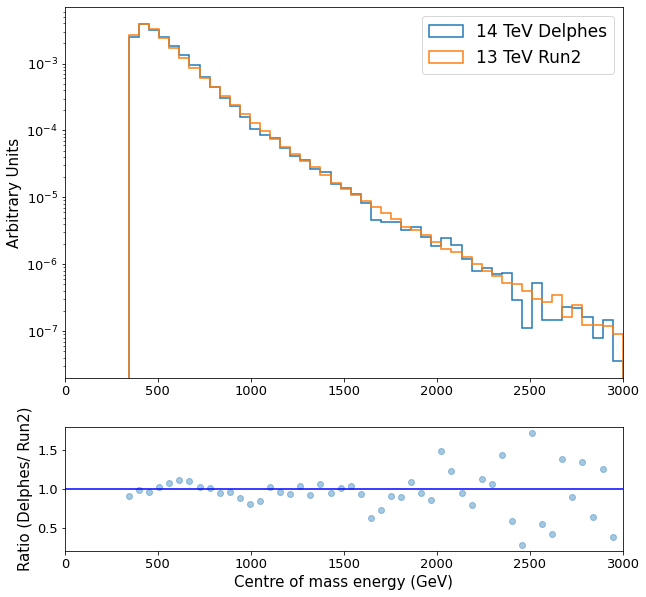

In [46]:
bins = np.linspace(345,3000, 50)

fig_style = {
    'figsize': (10, 10),
}

ratio_fig_style = {
    'figsize': (10, 10),
    'gridspec_kw': {'height_ratios': (3, 1)},
}


fig, (ax1, ax2)      = plt.subplots(nrows=2, **ratio_fig_style)
ns1, bins1, patches  = ax1.hist(Ecom, density=True, histtype='step', bins=bins , label='14 TeV Delphes', linewidth=1.5, weights=event_w)
ns2, bins2, patches  = ax1.hist(ecom, density=True, histtype='step', bins=bins , label='13 TeV Run2', linewidth=1.5)

ax1.legend(prop={'size': 17}, loc='upper right')
ax1.set_xlim(0, 3000)

ax2.scatter(bins[:-1],     # this is what makes it comparable
            ns1 / ns2,         # maybe check for div-by-zero!
            alpha=0.4)

ax1.set_ylabel('Arbitrary Units', fontsize=15)
ax1.set_yscale('log')
ax2.set_ylabel('Ratio (Delphes/ Run2)', fontsize=15)
ax2.set_xlabel('Centre of mass energy (GeV)', fontsize=15)
ax2.set_xlim(0,3000)

ax1.tick_params(axis="x", labelsize=13)
ax2.tick_params(axis="x", labelsize=13)

ax1.tick_params(axis="y", labelsize=13)
ax2.tick_params(axis="y", labelsize=13)
plt.axhline(y=1, color='b', linestyle='-')
plt.show()

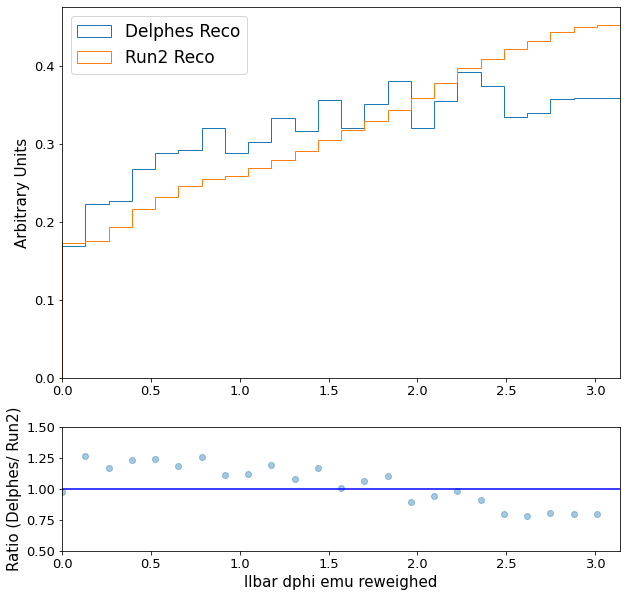

In [29]:
x_low    =  0
x_high   =  np.pi

binning = np.linspace(x_low,x_high, 25)

fig_style = {
    'figsize': (10, 10),
}

ratio_fig_style = {
    'figsize': (10, 10),
    'gridspec_kw': {'height_ratios': (3, 1)},
}


fig, (ax1, ax2) = plt.subplots(nrows=2, **ratio_fig_style)
ns1, bins1, patches  = ax1.hist(llbar_dphi, density=True, histtype='step', bins=binning, label='Delphes Reco', linewidth=1, weights=event_w)
ns2, bins2, patches  = ax1.hist(tt_llbar_dphi, density=True, histtype='step', bins=binning, label='Run2 Reco', linewidth=1)

ax1.legend(prop={'size': 17}, loc='upper left')
ax1.set_xlim(x_low,x_high)
ax2.scatter(binning[:-1],     # this is what makes it comparable
        ns1 / ns2,         # maybe check for div-by-zero!
        alpha=0.4)

ax1.set_ylabel('Arbitrary Units', fontsize=15)
ax2.set_ylabel('Ratio (Delphes/ Run2)', fontsize=15)
ax2.set_xlabel('llbar dphi emu reweighed', fontsize=15)
ax2.set_ylim(0.5,1.5)
ax2.set_xlim(x_low,x_high)

ax1.tick_params(axis="x", labelsize=13)
ax2.tick_params(axis="x", labelsize=13)

ax1.tick_params(axis="y", labelsize=13)
ax2.tick_params(axis="y", labelsize=13)
plt.axhline(y=1, color='b', linestyle='-')
plt.show()

<ipython-input-56-3262ec6918f9>:20: RuntimeWarning: invalid value encountered in true_divide
  ns1 / ns2,      # maybe check for div-by-zero!


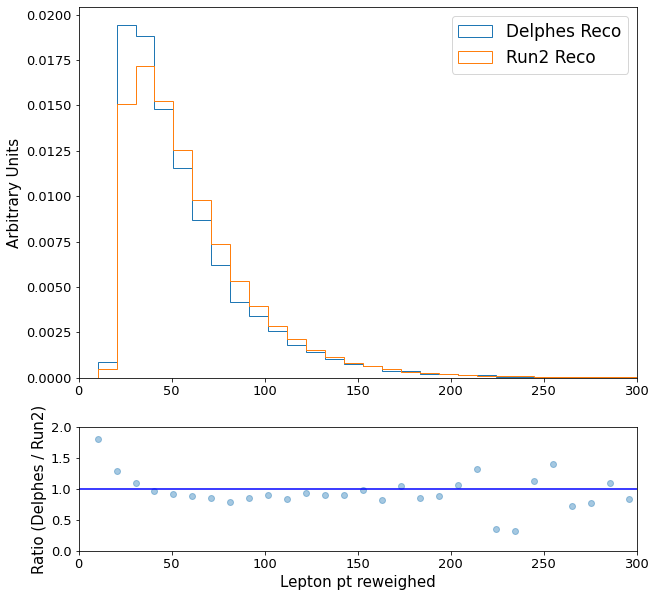

In [56]:
bins = np.linspace(0,500, 50)

fig_style = {
    'figsize': (10, 10),
}

ratio_fig_style = {
    'figsize': (10, 10),
    'gridspec_kw': {'height_ratios': (3, 1)},
}


fig, (ax1, ax2) = plt.subplots(nrows=2, **ratio_fig_style)
ns1, bins1, patches  = ax1.hist(np.clip(e_pt, bins[0], bins[-1]), density=True, histtype='step', bins=bins, label='Delphes Reco')
ns2, bins2, patches  = ax1.hist(np.clip(tt_l_pt       , bins[0], bins[-1]), density=True, histtype='step', bins=bins, label='Run2 Reco')

ax1.legend(prop={'size': 17}, loc='upper right')
ax1.set_xlim(0, 300)
ax2.scatter(bins[:-1],  # this is what makes it comparable
        ns1 / ns2,      # maybe check for div-by-zero!
        alpha=0.4)

ax1.set_ylabel('Arbitrary Units', fontsize=15)
ax2.set_ylabel('Ratio (Delphes / Run2)', fontsize=15)
ax2.set_xlabel('Lepton pt reweighed', fontsize=15)
ax2.set_ylim(0,2)
ax2.set_xlim(0,300)

ax1.tick_params(axis="x", labelsize=13)
ax2.tick_params(axis="x", labelsize=13)

ax1.tick_params(axis="y", labelsize=13)
ax2.tick_params(axis="y", labelsize=13)
plt.axhline(y=1, color='b', linestyle='-')
plt.show()

In [117]:
def vectorized_dR(lep_phi, lep_eta, jet_phi, jet_eta) :
    d_eta  = abs(lep_eta - jet_eta)
    d_phi0 = abs(lep_phi - jet_phi)
    
    # Find indices with values of dphi >  pi and subtract 2*pi
    mask0  = (d_phi0  >  np.pi)
    d_phi1 = np.where(mask0, d_phi0 - 2* np.pi, d_phi0)
    
    # Find indices with values of dphi < -pi and add 2*pi
    mask1  = (d_phi1 < - np.pi)
    d_phi  = np.where(mask1, d_phi1 + 2* np.pi, d_phi1)
    
    return np.sqrt(d_phi **2 + d_eta**2)

In [118]:
tt_bl_dR       = vectorized_dR(tt_l_phi   , tt_l_eta   , tt_b_phi   , tt_b_eta) 
tt_blbar_dR    = vectorized_dR(tt_l_phi   , tt_l_eta   , tt_bbar_phi, tt_bbar_eta) 
tt_bbarl_dR    = vectorized_dR(tt_lbar_phi, tt_lbar_eta, tt_b_phi   , tt_b_eta) 
tt_bbarlbar_dR = vectorized_dR(tt_lbar_phi, tt_lbar_eta, tt_bbar_phi, tt_bbar_eta)

tt_dR  = np.array([tt_bl_dR, tt_blbar_dR, tt_bbarl_dR, tt_bbarlbar_dR]).flatten()
weight = np.array([tt_event_weight,tt_event_weight,tt_event_weight,tt_event_weight]).flatten()

In [119]:
l_eta = np.array(l_eta)
l_phi = np.array(l_phi)

sl_eta = np.array(sl_eta)
sl_phi = np.array(sl_phi)

ljet_eta = np.array(ljet_eta)
ljet_phi = np.array(ljet_phi)

sljet_eta = np.array(sljet_eta)
sljet_phi = np.array(sljet_phi)

bl_dR       = vectorized_dR(ljet_phi , ljet_eta , l_phi , l_eta) 
blbar_dR    = vectorized_dR(sljet_phi, sljet_eta, l_phi , l_eta) 
bbarl_dR    = vectorized_dR(ljet_phi , ljet_eta , sl_phi, sl_eta) 
bbarlbar_dR = vectorized_dR(sljet_phi, sljet_eta, sl_phi, sl_eta)

dR = np.array([bl_dR, blbar_dR,  bbarl_dR,  bbarlbar_dR]).flatten()
ew = np.array([event_w,event_w,event_w,event_w]).flatten()

<ipython-input-110-0d4c59347c43>:22: RuntimeWarning: invalid value encountered in true_divide
  ns1 / ns2,         # maybe check for div-by-zero!


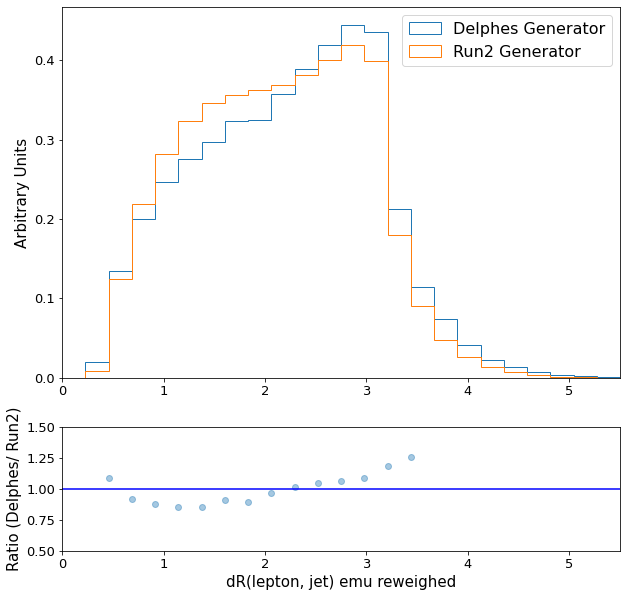

In [110]:
xlim    = 5.5
binning = np.linspace(0,xlim, 25)

fig_style = {
    'figsize': (10, 10),
}

ratio_fig_style = {
    'figsize': (10, 10),
    'gridspec_kw': {'height_ratios': (3, 1)},
}


fig, (ax1, ax2) = plt.subplots(nrows=2, **ratio_fig_style)
ns1, bins1, patches  = ax1.hist(dR       , density=True, histtype='step', bins=binning, label='Delphes Generator', linewidth=1)
ns2, bins2, patches  = ax1.hist(tt_dR, density=True, histtype='step', bins=binning, label='Run2 Generator'   , linewidth=1 )

ax1.legend(prop={'size': 16}, loc='upper right')
ax1.set_xlim(0,xlim)
#ax1.set_ylim(0,0.7)
ax2.scatter(binning[:-1],     # this is what makes it comparable
        ns1 / ns2,         # maybe check for div-by-zero!
        alpha=0.4)

ax1.set_ylabel('Arbitrary Units', fontsize=15)
ax2.set_ylabel('Ratio (Delphes/ Run2)', fontsize=15)
ax2.set_xlabel('dR(lepton, jet) emu reweighed', fontsize=15)
ax2.set_ylim(0.5,1.5)
ax2.set_xlim(0,xlim)

ax1.tick_params(axis="x", labelsize=13)
ax2.tick_params(axis="x", labelsize=13)

ax1.tick_params(axis="y", labelsize=13)
ax2.tick_params(axis="y", labelsize=13)
plt.axhline(y=1, color='b', linestyle='-')
plt.show()

In [103]:
step0_dphi = np.loadtxt('Delphes_gen0_llbar_dphi.txt')
step0_deta = np.loadtxt('Delphes_gen0_llbar_deta.txt')
step0_dR   = np.loadtxt('Delphes_gen_dR.txt')

In [104]:
step7_dphi = np.loadtxt('Delphes_gen7_llbar_dphi.txt')
step7_deta = np.loadtxt('Delphes_gen7_llbar_deta.txt')

In [120]:
binning   = np.linspace(0,np.pi,20)
ns1, bins = np.histogram(dR      , bins=binning)
ns2, bins = np.histogram(step0_dR, bins=binning)
bin_centers = bins[:-1] + np.diff(bins) / 2

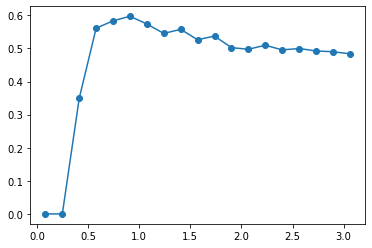

In [112]:
plt.plot(bin_centers, ns1/ns2, '-o')

In [113]:
tt_event_count     = uproot.open('emu_steps.root')['weightedEvents']
tt_events_step0    = uproot.open('emu_steps.root')['ttBar_treeVariables_step0']
tt_events_step7    = uproot.open('emu_steps.root')['ttBar_treeVariables_step7']
tt_events_step8    = uproot.open('emu_steps.root')['ttBar_treeVariables_step8']

tt_gen0_llbar_dphi = tt_events_step0['gen_llbar_delta_phi'].array()
tt_gen0_llbar_deta = tt_events_step0['gen_llbar_delta_eta'].array()

tt_gl_pt            = tt_events_step0['gen_l_pt'].array()
tt_gl_eta           = tt_events_step0['gen_l_eta'].array()
tt_gl_phi           = tt_events_step0['gen_l_phi'].array()

tt_glbar_pt         = tt_events_step0['gen_lbar_pt'].array()
tt_glbar_eta        = tt_events_step0['gen_lbar_eta'].array()
tt_glbar_phi        = tt_events_step0['gen_lbar_phi'].array()

tt_gb_pt            = tt_events_step0['gen_b_pt'].array()
tt_gb_eta           = tt_events_step0['gen_b_eta'].array()
tt_gb_phi           = tt_events_step0['gen_b_phi'].array()

tt_gbbar_pt         = tt_events_step0['gen_bbar_pt'].array()
tt_gbbar_eta        = tt_events_step0['gen_bbar_eta'].array()
tt_gbbar_phi        = tt_events_step0['gen_bbar_phi'].array()

tt_gen7_llbar_dphi = tt_events_step7['gen_llbar_delta_phi'].array()
tt_gen7_llbar_deta = tt_events_step7['gen_llbar_delta_eta'].array()

tt_gen8_llbar_dphi = tt_events_step8['gen_llbar_delta_phi'].array()
tt_gen8_llbar_deta = tt_events_step8['gen_llbar_delta_eta'].array()

tt_rec8_llbar_dphi = tt_events_step8['llbar_delta_phi'].array()
tt_rec8_llbar_deta = tt_events_step8['llbar_delta_eta'].array()

tt_event_weight    = tt_events_step8['eventWeight'].array()
tt_true_weight     = tt_events_step0['trueLevelWeight'].array()

In [121]:
tt_bl_dR       = vectorized_dR(tt_gl_phi   , tt_gl_eta   , tt_gb_phi   , tt_gb_eta) 
tt_blbar_dR    = vectorized_dR(tt_gl_phi   , tt_gl_eta   , tt_gbbar_phi, tt_gbbar_eta) 
tt_bbarl_dR    = vectorized_dR(tt_glbar_phi, tt_glbar_eta, tt_gb_phi   , tt_gb_eta) 
tt_bbarlbar_dR = vectorized_dR(tt_glbar_phi, tt_glbar_eta, tt_gbbar_phi, tt_gbbar_eta)

tt_gen_dR      = np.array([tt_bl_dR, tt_blbar_dR, tt_bbarl_dR, tt_bbarlbar_dR]).flatten()

In [122]:
ns3, bins1 = np.histogram(tt_dR, bins=binning)
ns4, bins2 = np.histogram(tt_gen_dR, bins=binning)

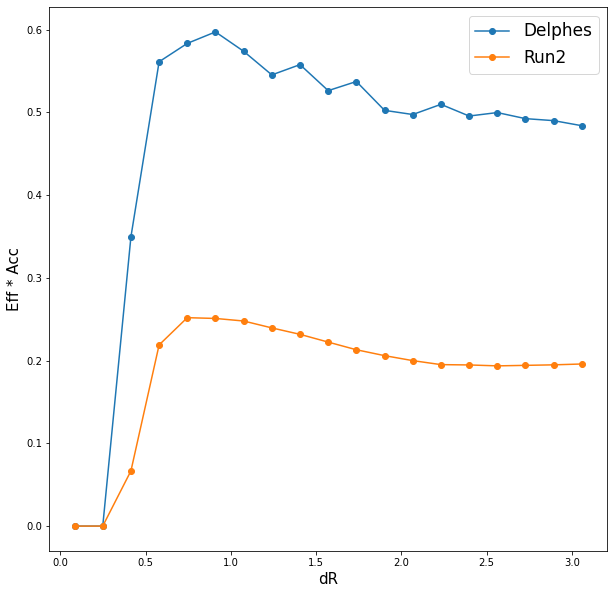

In [123]:
bin_centers = bins1[:-1] + np.diff(bins1) / 2
fig,ax = plt.subplots(figsize=(10,10))
ax.plot(bin_centers, ns1/ns2, '-o', label='Delphes')
ax.plot(bin_centers, ns3/ns4, '-o', label='Run2')
ax.set_ylabel('Eff * Acc', fontsize=15)
ax.set_xlabel('dR', fontsize=15)
ax.legend(prop={'size': 17}, loc='upper right')

In [76]:
# Scalar sum of hadronic transvers energy
HT      = []
# Pt's of all jets in an event
for i in range(len(jet_PUPPI_eta)):
  HT_temp = 0
  for j in range(len(jet_PUPPI_eta[i])):
    HT_temp += jet_PUPPI_pt[i][j]
    
  HT.append(HT_temp)

In [78]:
# Multiply with the selection array 
HT        = np.array(HT)
selection = np.array(selection)
HT_w_cuts = HT * selection
HT_w_cuts = HT_w_cuts[HT_w_cuts > 0]

In [28]:
de    = []
for i in range(len(Ecom)):
    if (Ecom[i] > 345 and Ecom[i] < 3000) :
        de.append(Ecom[i])
de = np.array(de)

In [38]:
np.savetxt('Delphes_com_energy.txt', de, fmt='%f')

<ipython-input-91-218d042970cc>:21: RuntimeWarning: invalid value encountered in true_divide
  ns1 / ns2,         # maybe check for div-by-zero!


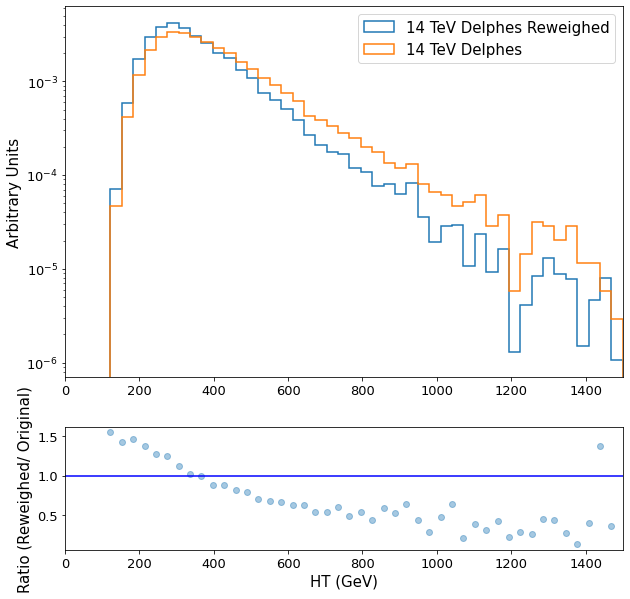

In [91]:
bins = np.linspace(0,1500, 50)

fig_style = {
    'figsize': (10, 10),
}

ratio_fig_style = {
    'figsize': (10, 10),
    'gridspec_kw': {'height_ratios': (3, 1)},
}


fig, (ax1, ax2)      = plt.subplots(nrows=2, **ratio_fig_style)
ns1, bins1, patches  = ax1.hist(HT, density=True, histtype='step', bins=bins , label='14 TeV Delphes Reweighed', linewidth=1.5, weights=event_w)
ns2, bins2, patches  = ax1.hist(HT, density=True, histtype='step', bins=bins , label='14 TeV Delphes', linewidth=1.5)

ax1.legend(prop={'size': 15}, loc='upper right')
ax1.set_xlim(0, 1500)

ax2.scatter(bins[:-1],     # this is what makes it comparable
            ns1 / ns2,         # maybe check for div-by-zero!
            alpha=0.4)

ax1.set_ylabel('Arbitrary Units', fontsize=15)
ax1.set_yscale('log')
ax2.set_ylabel('Ratio (Reweighed/ Original)', fontsize=15)
ax2.set_xlabel('HT (GeV)', fontsize=15)
ax2.set_xlim(0,1500)

ax1.tick_params(axis="x", labelsize=13)
ax2.tick_params(axis="x", labelsize=13)

ax1.tick_params(axis="y", labelsize=13)
ax2.tick_params(axis="y", labelsize=13)
plt.axhline(y=1, color='b', linestyle='-')
plt.show()